In [42]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})
file_prefix = '/Users/jclialex/PycharmProjects/whiteboxmi_expdata/expdata/simplex/'


def analysis(epochs,num_user,dataset,data_num,eval_data_size,model,num_step,comm_round_list,exptype='simplex',new_name_style=False):
    # '_0_0.0_0.0_0_0.0_0_'
    all_acc = []
    all_loss = []
    #all_flatness_acc = []
    #all_flatness_loss = []
    if (num_step == 1 and (not new_name_style)):
        eval_data_size = data_num
    for this_epoch in epochs:
        for this_comm_round_idx in comm_round_list:
            active_attacker = 0 
            if(dataset == 'purchase'):
                active_attacker = 1
            else:
                active_attacker = 0
            
            this_file_name = file_prefix + exptype + '_test_acc_0_server_'+str(active_attacker)+'_0.0_'+str(num_user) +'_'+ str(num_step) +\
                        '_0_0.0_0.0_0_0.0_0_'+str(this_epoch+1)+'_'+ str(num_step) + '_' + str(this_comm_round_idx)+ \
                        '_' + str(dataset)+'_'+str(data_num)+'_'+str(eval_data_size)+'_'+str(model)+'.npy'
            
            if (new_name_style):
                this_file_name = file_prefix + exptype + '_test_acc_'+str(num_user) +'_'+ str(num_step) +\
                        '_' + str(this_epoch+1)+'_'+ str(num_step) + '_' + str(this_comm_round_idx)+ \
                        '_' + str(dataset)+'_'+str(data_num)+'_'+str(eval_data_size)+'_'+str(model)+'.npy'
            
                
                
            this_data = np.load(this_file_name)
            all_acc.append(this_data)

            this_file_name = file_prefix + exptype + '_test_loss_0_server_'+str(active_attacker)+'_0.0_'+str(num_user)+'_'+ str(num_step)+ \
                        '_0_0.0_0.0_0_0.0_0_'+str(this_epoch+1)+'_'+ str(num_step) + '_' + str(this_comm_round_idx)+ \
                        '_' + str(dataset)+'_'+str(data_num)+'_'+str(eval_data_size)+'_'+str(model)+'.npy'
            
            
            if (new_name_style):
                this_file_name = file_prefix + exptype + '_test_loss_'+str(num_user) +'_'+ str(num_step) +\
                        '_' + str(this_epoch+1)+'_'+ str(num_step) + '_' + str(this_comm_round_idx)+ \
                        '_' + str(dataset)+'_'+str(data_num)+'_'+str(eval_data_size)+'_'+str(model)+'.npy'
            
                
            this_data = np.load(this_file_name)
            all_loss.append(this_data)
            
            #this_file_name = file_prefix + 'flatness_test_acc_0_server_0_0.0_'+str(num_user)+'_'+ str(num_step)+\
            #            '_0_0.0_0.0_0_0.0_0_'+str(this_epoch+1)+'_'+ str(num_step) + '_' + str(this_comm_round_idx)+ \
            #            '_' + str(dataset)+'_'+str(data_num)+'_'+str(eval_data_size)+'_'+str(model)+'.npy'
            #this_data = np.load(this_file_name)
            #all_flatness_acc.append(this_data)
            #print (this_data.shape)
            
            #this_file_name = file_prefix + 'flatness_test_loss_0_server_0_0.0_'+str(num_user)+'_'+ str(num_step)+\
            #            '_0_0.0_0.0_0_0.0_0_'+str(this_epoch+1)+'_'+ str(num_step) + '_' + str(this_comm_round_idx)+ \
            #            '_' + str(dataset)+'_'+str(data_num)+'_'+str(eval_data_size)+'_'+str(model)+'.npy'
            #this_data = np.load(this_file_name)
            #all_flatness_loss.append(this_data)
            #print (this_data.shape)
            
        
    all_acc = np.array(all_acc)
    all_loss = np.array(all_loss)
    #print (all_acc.shape,all_loss.shape)
    #all_flatness_acc = np.array(all_flatness_acc)
    #all_flatness_loss = np.array(all_flatness_loss)
    
    if(exptype == 'simplex'):
    
        ## data shape should be [epochs,100,3], 100 is the # of simplex samples, 3 means [train,test,bb-attack]
    
        train_avg = np.average(all_acc[:,:,0],axis=1)
        train_std = np.sqrt(np.var(all_acc[:,:,0],axis=1))
        test_avg = np.average(all_acc[:,:,1],axis=1)
        test_std = np.sqrt(np.var(all_acc[:,:,1],axis=1))
        attack_avg = np.average(all_acc[:,:,2],axis=1)
        attack_std = np.sqrt(np.var(all_acc[:,:,2],axis=1))
    
        train_loss_avg = np.average(all_loss[:,:,0],axis=1)
        train_loss_std = np.sqrt(np.var(all_loss[:,:,0],axis=1))
        test_loss_avg = np.average(all_loss[:,:,1],axis=1)
        test_loss_std = np.sqrt(np.var(all_loss[:,:,1],axis=1))
    
        '''
        fig = plt.figure(figsize=(15,5))
        plt.errorbar(epochs,train_loss_avg,yerr=train_loss_std)
        plt.errorbar(epochs+0.5,test_loss_avg,yerr=test_loss_std)
        plt.xlabel('epochs')
        #plt.errorbar(epochs+3,attack_avg,yerr=attack_std)
    
        plt.legend(['train_loss','test_loss'])
        plt.title(str(num_user)+ ' users_' + str(num_step)+ ' steps_' + str(dataset)+ '_' + str(model))
    
        plt.show()
        '''
    
        return_train_acc = np.concatenate((np.reshape(train_avg,(-1,1)),np.reshape(train_std,(-1,1))),axis=1)
        return_test_acc = np.concatenate((np.reshape(test_avg,(-1,1)),np.reshape(test_std,(-1,1))),axis=1)
        return_test_loss = np.concatenate((np.reshape(test_loss_avg,(-1,1)),np.reshape(test_loss_std,(-1,1))),axis=1)
        return_train_loss = np.concatenate((np.reshape(train_loss_avg,(-1,1)),np.reshape(train_loss_std,(-1,1))),axis=1)
    
        #print (return_acc.shape,return_test_loss.shape,return_train_loss.shape)
        #print ("simplex")
    
        return return_train_acc,return_test_acc,return_train_loss,return_test_loss
    
    elif (exptype == 'flatness'):
        #print ("flatness")
        
        return all_acc[:,:,:,:-1],all_loss
        
        

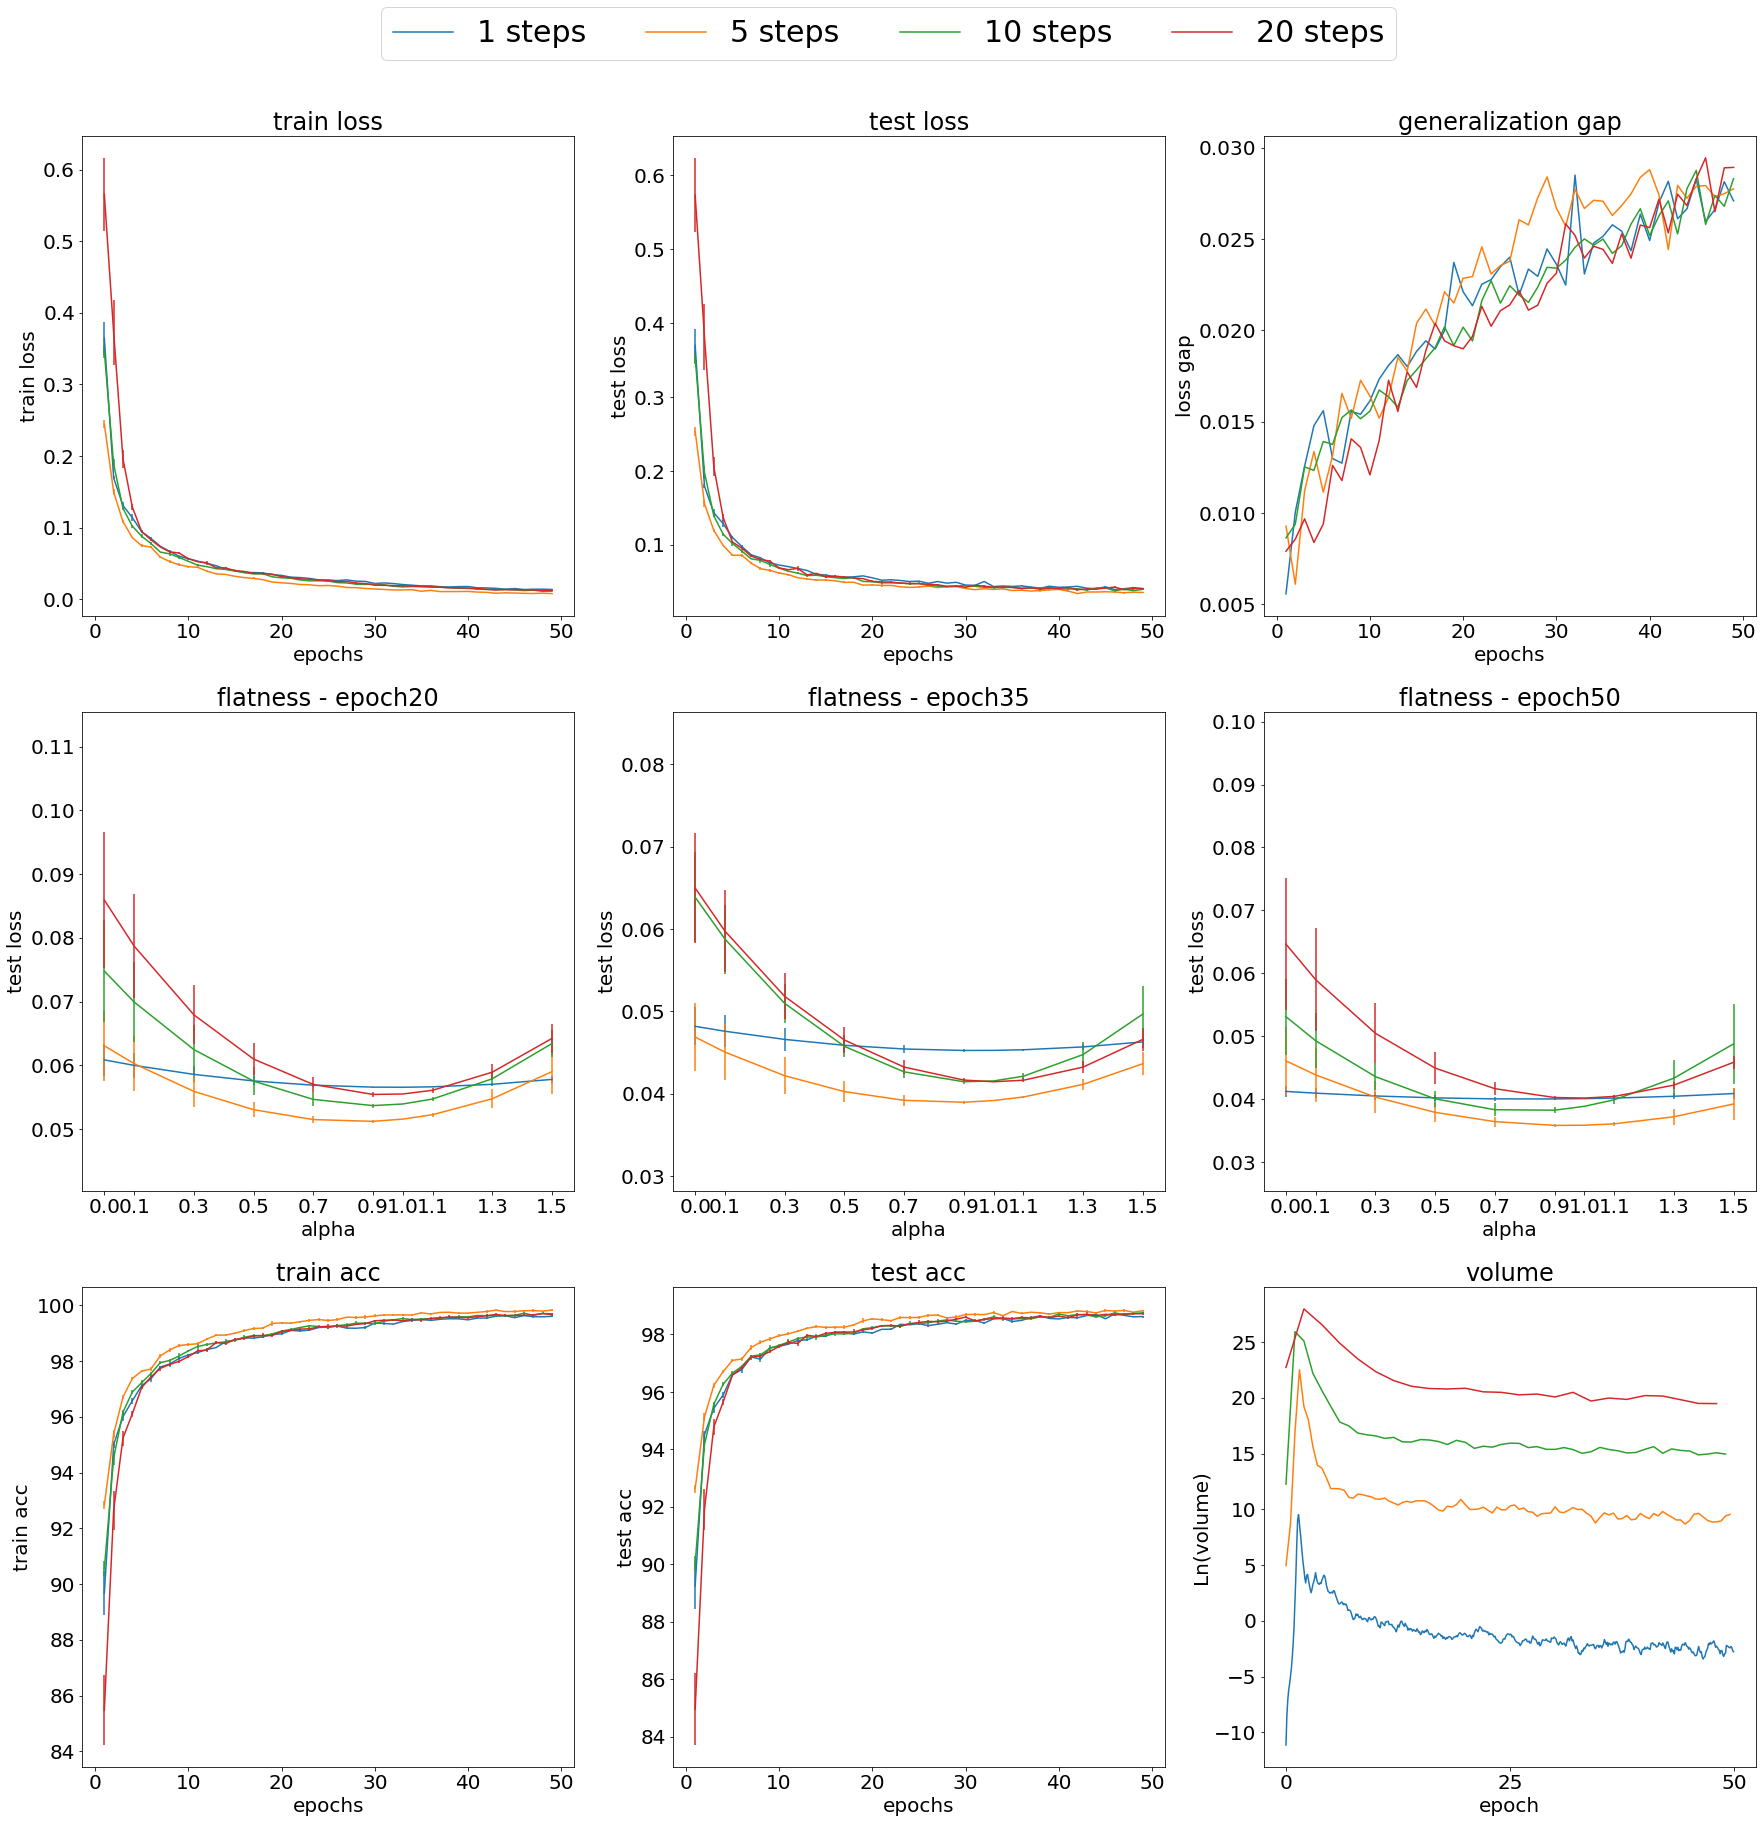

In [46]:
epochs = np.arange(49)+1
num_user = 10
dataset = 'mnist'
eval_data_size = 50
model = 'mnist'
total_data_num = 2000
num_step_list = [1,5,10,20]
batch_size = 100
total_step = int(total_data_num / batch_size)
comm_round_list = [[19],[3],[1],[0]]
num_step = [1,5,10,20]

plt.rcParams.update({'font.size': 20})
preset_fig_size = (30,30)
fig = plt.figure(figsize=preset_fig_size)

step_epoch = [15,30,45]
alpha_list = [0,0.1,0.3,0.5,0.7,0.9,1,1.1,1.3,1.5]
alpha_list = np.array(alpha_list)
flat_all_acc = []
flat_all_loss = []

train_acc = []
test_acc = []
test_loss = []
train_loss = []

for this_num_step,this_comm_round_list in zip(num_step_list,comm_round_list):
    return_train_acc,return_test_acc,return_train_loss,return_test_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                                                             num_step=this_num_step,comm_round_list=this_comm_round_list,exptype='simplex',new_name_style=True)
    train_acc.append(return_train_acc)
    test_acc.append(return_test_acc)
    train_loss.append(return_train_loss)
    test_loss.append(return_test_loss)

train_acc = np.array(train_acc)
test_acc = np.array(test_acc)
test_loss = np.array(test_loss)
train_loss = np.array(train_loss)


plt.subplot(3,3,1)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_loss[idx,:,0],yerr=train_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.title('train loss')

plt.subplot(3,3,2)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_loss[idx,:,0],yerr=test_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test loss')
plt.title('test loss')

plt.subplot(3,3,3)
for idx,this_num_step in enumerate(num_step_list):
    plt.plot(epochs,test_loss[idx,:,0]-train_loss[idx,:,0])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('loss gap')
plt.title('generalization gap')

    
for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
    all_acc,all_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                            num_step=this_num_step,comm_round_list=this_comm_round_list,exptype='flatness',new_name_style=True)
    
    flat_all_acc.append(all_acc)
    flat_all_loss.append(all_loss)

flat_all_acc = np.array(flat_all_acc)
flat_all_loss = np.array(flat_all_loss)

for epoch_idx,this_epoch in enumerate(step_epoch):
    plt.subplot(3,3,epoch_idx+4)
    loss_ylim_max = np.amax(flat_all_loss[:,this_epoch,:,:,1])+0.01
    loss_ylim_min = np.amin(flat_all_loss[:,this_epoch,:,:,1])-0.01
    for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
        this_epoch_test_loss = flat_all_loss[idx,this_epoch,:,:,1]
        plt.errorbar(alpha_list,np.average(this_epoch_test_loss,axis=0),yerr=np.sqrt(np.var(this_epoch_test_loss,axis=0)))
    plt.xlabel('alpha')
    plt.xticks(alpha_list)
    plt.title(f'flatness - epoch{this_epoch+5}')
    plt.ylabel('test loss')
    #plt.legend([str(num)+' steps' for num in num_step_list])
    plt.ylim(loss_ylim_min,loss_ylim_max)
    

plt.subplot(3,3,7)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train acc')
plt.title('train acc')

plt.subplot(3,3,8)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test acc')
plt.title('test acc')
    
plt.subplot(3,3,9)
## volume
for idx,this_step in enumerate(num_step):
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    length = len(this_volume)//2
    plt.plot(np.arange(len(this_volume))[:length]*(this_step),np.log(this_volume[:length,1]))
    
plt.xticks(ticks=[0,250,500],labels=[0,25,50])
plt.xlabel('epoch')
plt.ylabel('Ln(volume)')
plt.title('volume')
plt.legend([str(num)+' steps' for num in num_step_list],bbox_to_anchor=(0.3,3.7),ncol=4,prop={'size': 30})
plt.savefig(f'{dataset}_step_summary.pdf',dpi=800,bbox_inches='tight')


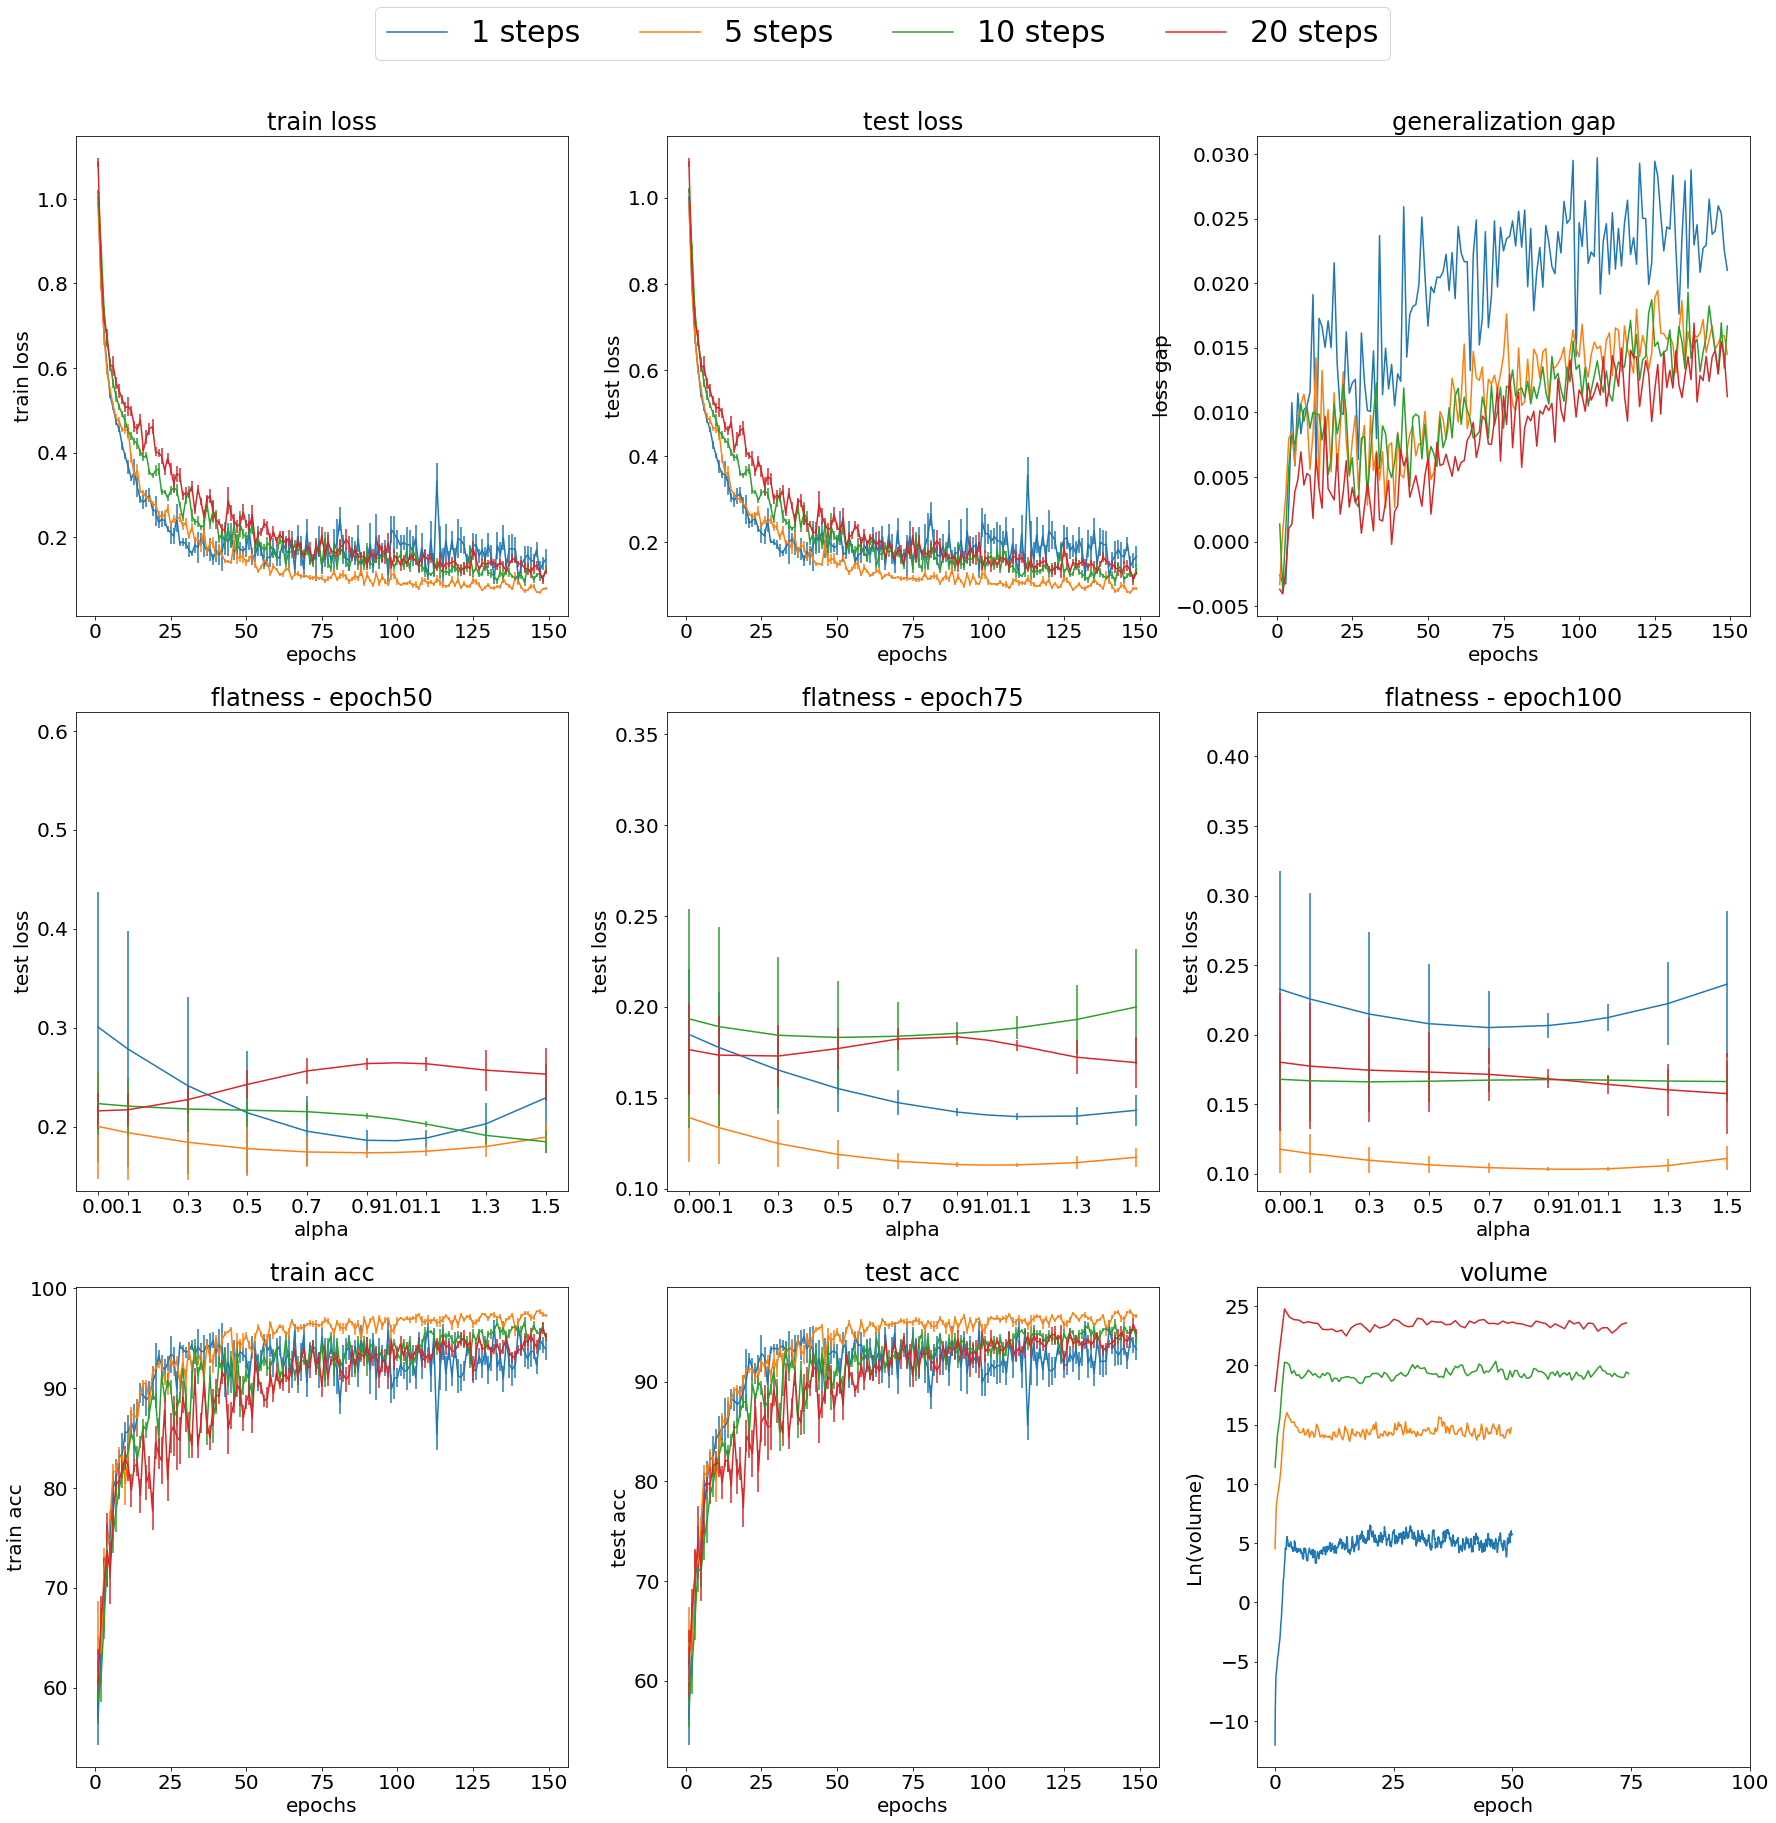

In [49]:
epochs = np.arange(149)+1
num_user = 10
dataset = 'sat6'
eval_data_size = 100
model = 'sat6'
total_data_num = 2000
num_step_list = [1,5,10,20]
batch_size = 100
total_step = int(total_data_num / batch_size)
comm_round_list = [[19],[3],[1],[0]]
num_step = [1,5,10,20]

plt.rcParams.update({'font.size': 20})
preset_fig_size = (30,30)
fig = plt.figure(figsize=preset_fig_size)

step_epoch = [45,70,95]
alpha_list = [0,0.1,0.3,0.5,0.7,0.9,1,1.1,1.3,1.5]
alpha_list = np.array(alpha_list)
flat_all_acc = []
flat_all_loss = []

train_acc = []
test_acc = []
test_loss = []
train_loss = []

for this_num_step,this_comm_round_list in zip(num_step_list,comm_round_list):
    return_train_acc,return_test_acc,return_train_loss,return_test_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                                                             num_step=this_num_step,comm_round_list=this_comm_round_list,exptype='simplex',new_name_style=True)
    train_acc.append(return_train_acc)
    test_acc.append(return_test_acc)
    train_loss.append(return_train_loss)
    test_loss.append(return_test_loss)

train_acc = np.array(train_acc)
test_acc = np.array(test_acc)
test_loss = np.array(test_loss)
train_loss = np.array(train_loss)


plt.subplot(3,3,1)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_loss[idx,:,0],yerr=train_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.title('train loss')

plt.subplot(3,3,2)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_loss[idx,:,0],yerr=test_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test loss')
plt.title('test loss')

plt.subplot(3,3,3)
for idx,this_num_step in enumerate(num_step_list):
    plt.plot(epochs,test_loss[idx,:,0]-train_loss[idx,:,0])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('loss gap')
plt.title('generalization gap')

    
for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
    all_acc,all_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                            num_step=this_num_step,comm_round_list=this_comm_round_list,exptype='flatness',new_name_style=True)
    
    flat_all_acc.append(all_acc)
    flat_all_loss.append(all_loss)

flat_all_acc = np.array(flat_all_acc)
flat_all_loss = np.array(flat_all_loss)

for epoch_idx,this_epoch in enumerate(step_epoch):
    plt.subplot(3,3,epoch_idx+4)
    loss_ylim_max = np.amax(flat_all_loss[:,this_epoch,:,:,1])+0.01
    loss_ylim_min = np.amin(flat_all_loss[:,this_epoch,:,:,1])-0.01
    for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
        this_epoch_test_loss = flat_all_loss[idx,this_epoch,:,:,1]
        plt.errorbar(alpha_list,np.average(this_epoch_test_loss,axis=0),yerr=np.sqrt(np.var(this_epoch_test_loss,axis=0)))
    plt.xlabel('alpha')
    plt.xticks(alpha_list)
    plt.title(f'flatness - epoch{this_epoch+5}')
    plt.ylabel('test loss')
    #plt.legend([str(num)+' steps' for num in num_step_list])
    plt.ylim(loss_ylim_min,loss_ylim_max)
    

plt.subplot(3,3,7)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train acc')
plt.title('train acc')

plt.subplot(3,3,8)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test acc')
plt.title('test acc')
    
plt.subplot(3,3,9)
## volume
for idx,this_step in enumerate(num_step):
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    length = len(this_volume)//2
    plt.plot(np.arange(len(this_volume))[:length]*(this_step),np.log(this_volume[:length,1]))
    
plt.xticks(ticks=[0,500,1000,1500,2000],labels=[0,25,50,75,100])
plt.xlabel('epoch')
plt.ylabel('Ln(volume)')
plt.title('volume')
plt.legend([str(num)+' steps' for num in num_step_list],bbox_to_anchor=(0.3,3.7),ncol=4,prop={'size': 30})
plt.savefig(f'{dataset}_step_summary.pdf',dpi=800,bbox_inches='tight')


[0.27358426 0.25731811 0.27037358 0.2740516 ]


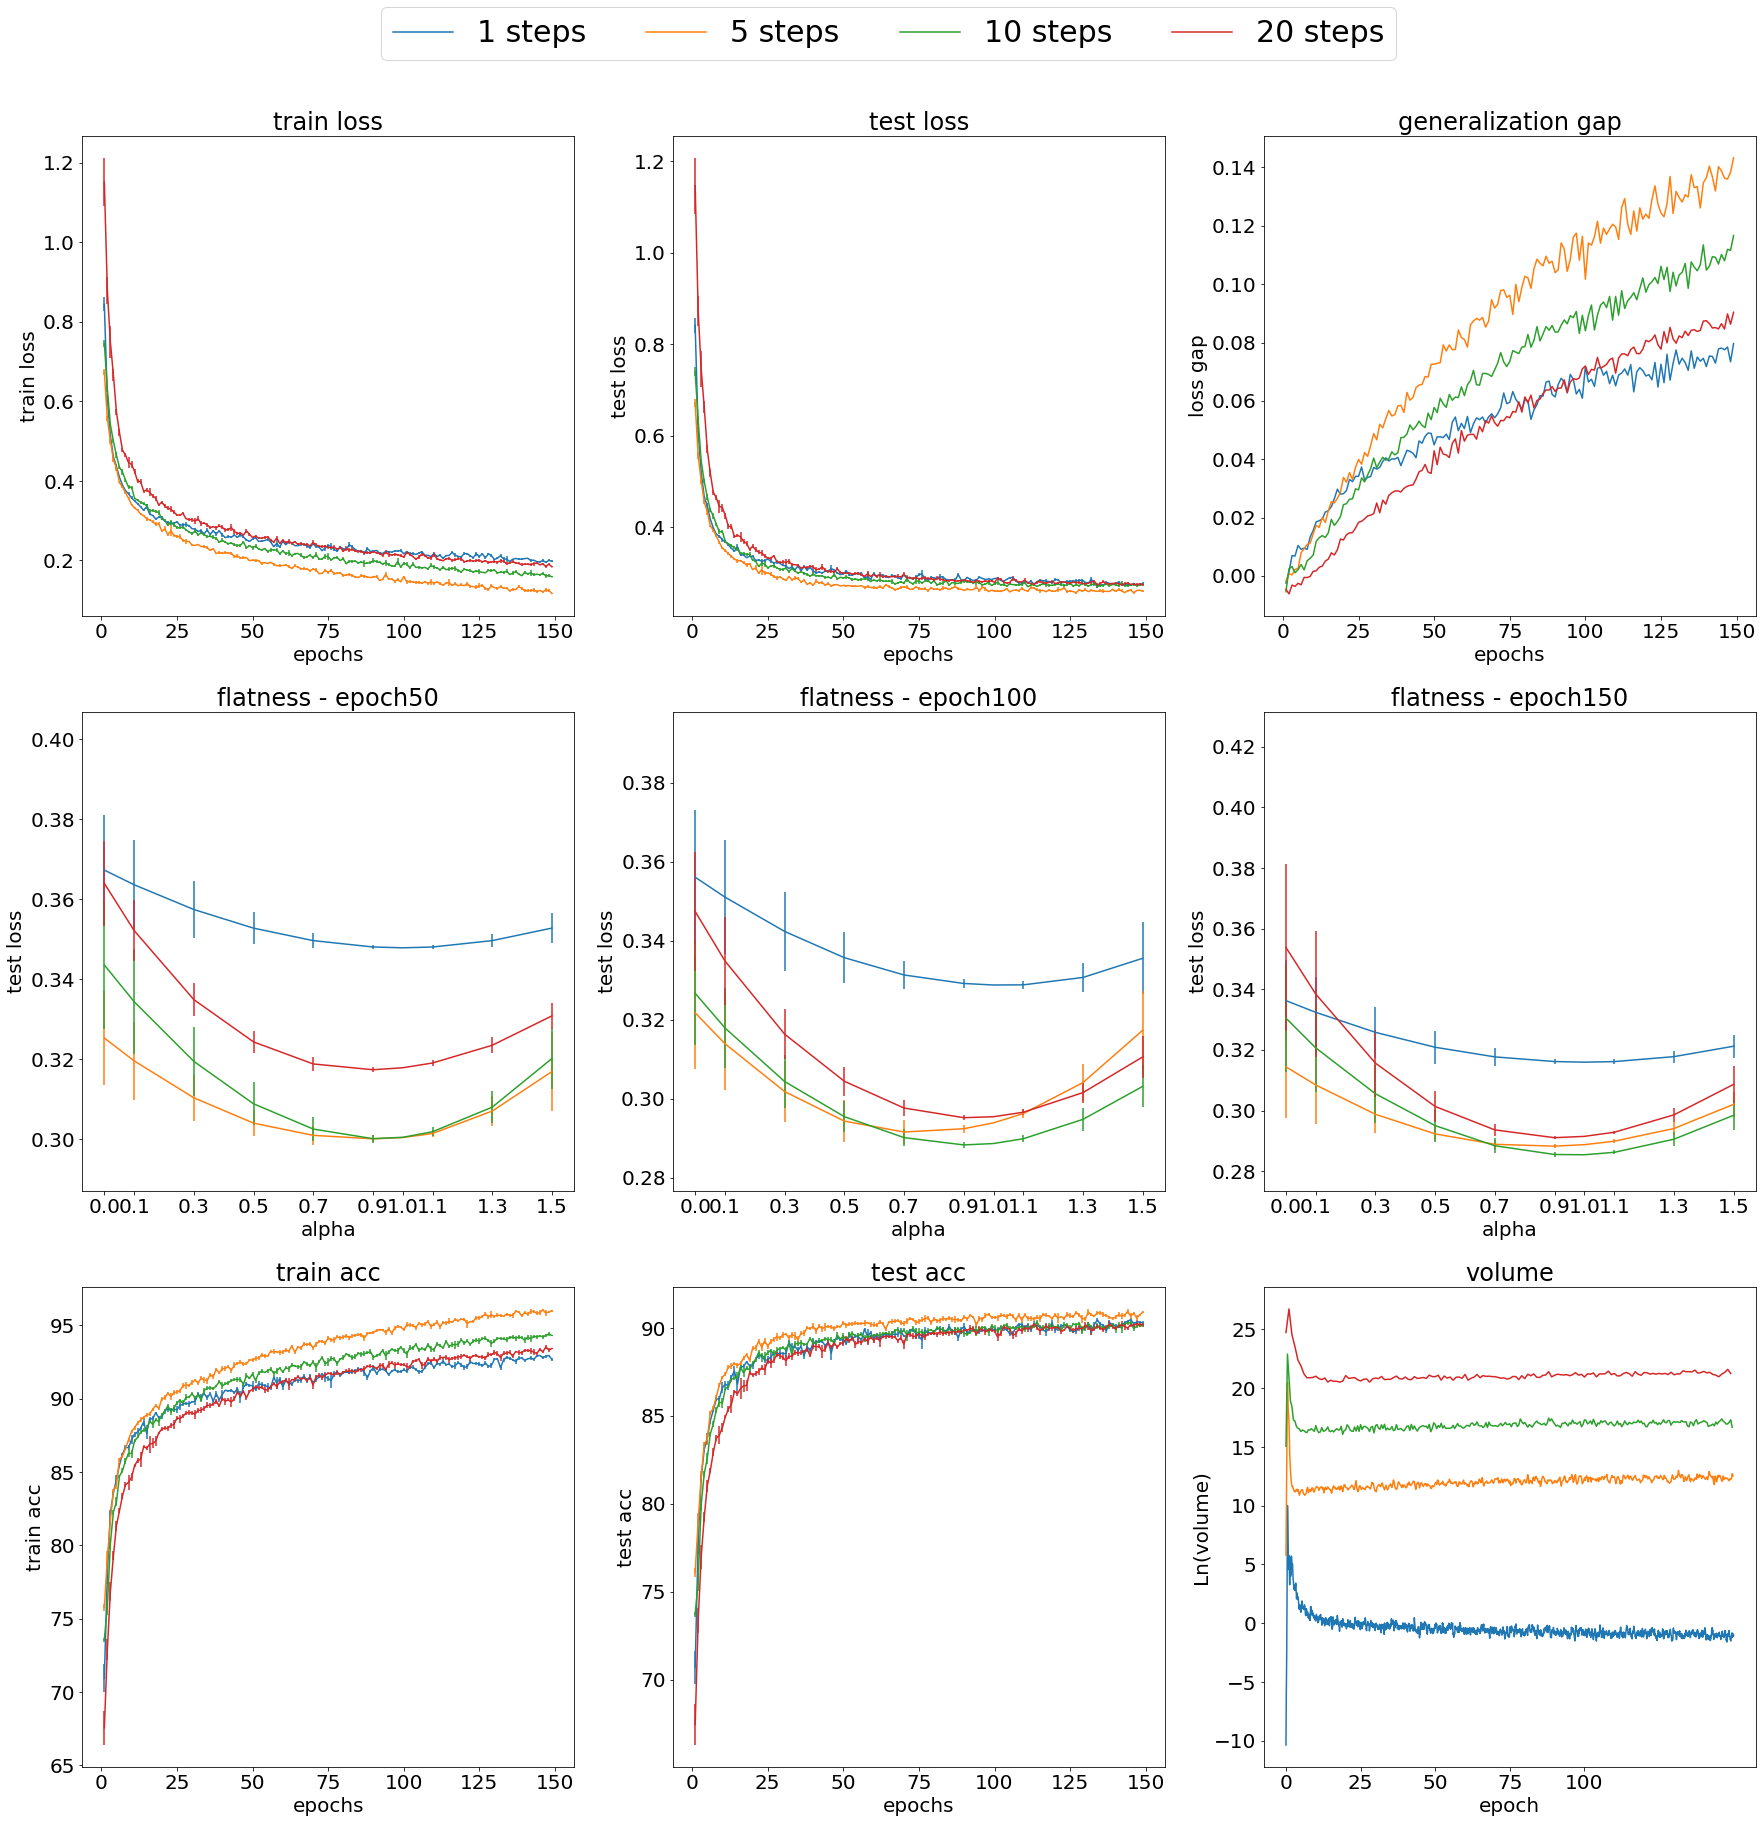

In [200]:
epochs = np.arange(149)+1
num_user = 10
dataset = 'fashion_mnist'
eval_data_size = 50
model = 'fashion_mnist'
total_data_num = 2000
num_step_list = [1,5,10,20]
batch_size = 100
total_step = int(total_data_num / batch_size)
comm_round_list = [[19],[3],[1],[0]]
num_step = [1,5,10,20]

plt.rcParams.update({'font.size': 20})
preset_fig_size = (30,30)
fig = plt.figure(figsize=preset_fig_size)

step_epoch = [45,95,145]
alpha_list = [0,0.1,0.3,0.5,0.7,0.9,1,1.1,1.3,1.5]
alpha_list = np.array(alpha_list)
flat_all_acc = []
flat_all_loss = []

train_acc = []
test_acc = []
test_loss = []
train_loss = []


for this_num_step,this_comm_round_list in zip(num_step_list,comm_round_list):
    return_train_acc,return_test_acc,return_train_loss,return_test_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                                                             num_step=this_num_step,comm_round_list=this_comm_round_list,exptype='simplex',new_name_style=True)
    train_acc.append(return_train_acc)
    test_acc.append(return_test_acc)
    train_loss.append(return_train_loss)
    test_loss.append(return_test_loss)

train_acc = np.array(train_acc)
test_acc = np.array(test_acc)
test_loss = np.array(test_loss)
train_loss = np.array(train_loss)

#print (train_acc[:,100,0],test_acc[:,100,0],train_loss[:,100,0],test_loss[:,100,0])
#print (train_acc[:,150,0],test_acc[:,150,0],train_loss[:,150,0],test_loss[:,150,0])
print (np.amin(test_loss[:,:,0],axis=1))

plt.subplot(3,3,1)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_loss[idx,:,0],yerr=train_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.title('train loss')

plt.subplot(3,3,2)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_loss[idx,:,0],yerr=test_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test loss')
plt.title('test loss')

plt.subplot(3,3,3)
for idx,this_num_step in enumerate(num_step_list):
    plt.plot(epochs,test_loss[idx,:,0]-train_loss[idx,:,0])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('loss gap')
plt.title('generalization gap')

    
for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
    all_acc,all_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                            num_step=this_num_step,comm_round_list=this_comm_round_list,exptype='flatness',new_name_style=True)
    
    flat_all_acc.append(all_acc)
    flat_all_loss.append(all_loss)

flat_all_acc = np.array(flat_all_acc)
flat_all_loss = np.array(flat_all_loss)

for epoch_idx,this_epoch in enumerate(step_epoch):
    plt.subplot(3,3,epoch_idx+4)
    loss_ylim_max = np.amax(flat_all_loss[:,this_epoch,:,:,1])+0.01
    loss_ylim_min = np.amin(flat_all_loss[:,this_epoch,:,:,1])-0.01
    for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
        this_epoch_test_loss = flat_all_loss[idx,this_epoch,:,:,1]
        plt.errorbar(alpha_list,np.average(this_epoch_test_loss,axis=0),yerr=np.sqrt(np.var(this_epoch_test_loss,axis=0)))
    plt.xlabel('alpha')
    plt.xticks(alpha_list)
    plt.title(f'flatness - epoch{this_epoch+5}')
    plt.ylabel('test loss')
    #plt.legend([str(num)+' steps' for num in num_step_list])
    plt.ylim(loss_ylim_min,loss_ylim_max)
    

plt.subplot(3,3,7)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train acc')
plt.title('train acc')

plt.subplot(3,3,8)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test acc')
plt.title('test acc')
    
plt.subplot(3,3,9)
## volume
for idx,this_step in enumerate(num_step):
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    length = len(this_volume)
    plt.plot(np.arange(len(this_volume))[:length]*(this_step),np.log(this_volume[:length,1]))
    
#plt.xticks(ticks=[0,500,1000,1500,2000,2500,3000],labels=[0,25,50,75,100,125,150])
plt.xticks(ticks=[0,500,1000,1500,2000],labels=[0,25,50,75,100])
plt.xlabel('epoch')
plt.ylabel('Ln(volume)')
plt.title('volume')
plt.legend([str(num)+' steps' for num in num_step_list],bbox_to_anchor=(0.3,3.7),ncol=4,prop={'size': 30})
plt.savefig(f'{dataset}_step_summary.pdf',dpi=800,bbox_inches='tight')


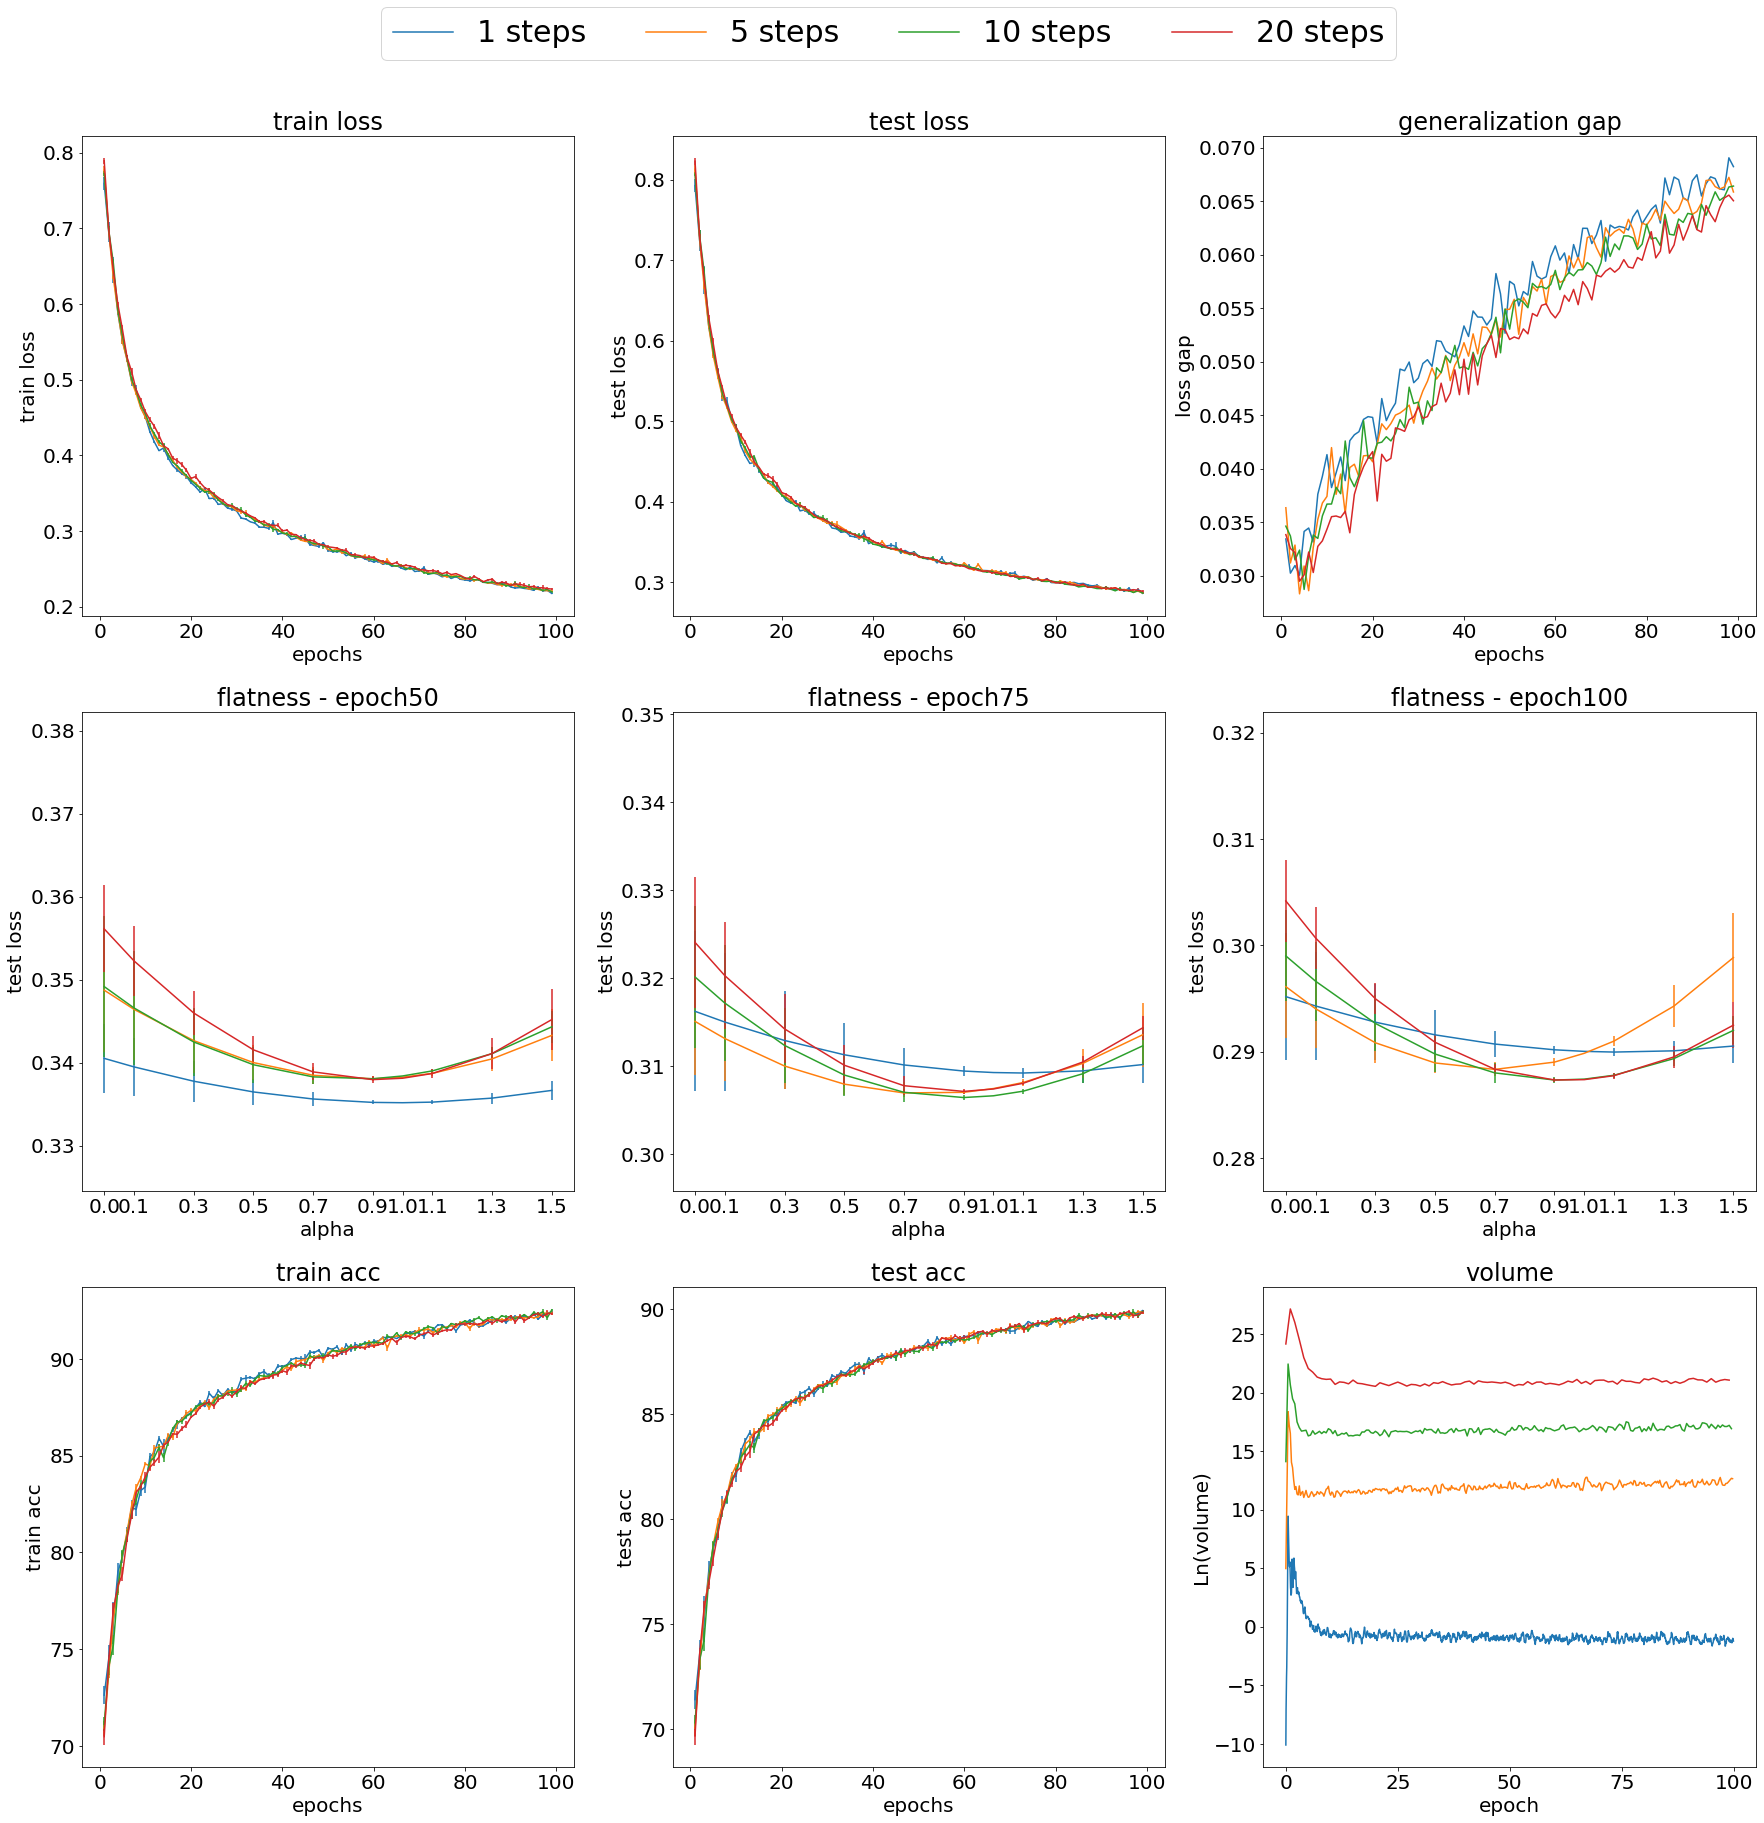

In [24]:
epochs = np.arange(99)+1
num_user = 10
dataset = 'fashion_mnist'
eval_data_size = 50
model = 'fashion_mnist'
total_data_num = 4000
num_step_list = [1,5,10,20]
batch_size = 100
total_step = int(total_data_num / batch_size)
comm_round_list = [[39],[7],[3],[1]]
num_step = [1,5,10,20]

plt.rcParams.update({'font.size': 20})
preset_fig_size = (30,30)
fig = plt.figure(figsize=preset_fig_size)

step_epoch = [45,70,95]
alpha_list = [0,0.1,0.3,0.5,0.7,0.9,1,1.1,1.3,1.5]
alpha_list = np.array(alpha_list)
flat_all_acc = []
flat_all_loss = []

train_acc = []
test_acc = []
test_loss = []
train_loss = []

for this_num_step,this_comm_round_list in zip(num_step_list,comm_round_list):
    return_train_acc,return_test_acc,return_train_loss,return_test_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                                                             num_step=this_num_step,comm_round_list=this_comm_round_list,exptype='simplex')
    train_acc.append(return_train_acc)
    test_acc.append(return_test_acc)
    train_loss.append(return_train_loss)
    test_loss.append(return_test_loss)

train_acc = np.array(train_acc)
test_acc = np.array(test_acc)
test_loss = np.array(test_loss)
train_loss = np.array(train_loss)

#print (train_acc[:,100,0],test_acc[:,100,0],train_loss[:,100,0],test_loss[:,100,0])
#print (train_acc[:,150,0],test_acc[:,150,0],train_loss[:,150,0],test_loss[:,150,0])

plt.subplot(3,3,1)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_loss[idx,:,0],yerr=train_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.title('train loss')

plt.subplot(3,3,2)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_loss[idx,:,0],yerr=test_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test loss')
plt.title('test loss')

plt.subplot(3,3,3)
for idx,this_num_step in enumerate(num_step_list):
    plt.plot(epochs,test_loss[idx,:,0]-train_loss[idx,:,0])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('loss gap')
plt.title('generalization gap')

    
for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
    all_acc,all_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                            num_step=this_num_step,comm_round_list=this_comm_round_list,exptype='flatness')
    
    flat_all_acc.append(all_acc)
    flat_all_loss.append(all_loss)

flat_all_acc = np.array(flat_all_acc)
flat_all_loss = np.array(flat_all_loss)

for epoch_idx,this_epoch in enumerate(step_epoch):
    plt.subplot(3,3,epoch_idx+4)
    loss_ylim_max = np.amax(flat_all_loss[:,this_epoch,:,:,1])+0.01
    loss_ylim_min = np.amin(flat_all_loss[:,this_epoch,:,:,1])-0.01
    for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
        this_epoch_test_loss = flat_all_loss[idx,this_epoch,:,:,1]
        plt.errorbar(alpha_list,np.average(this_epoch_test_loss,axis=0),yerr=np.sqrt(np.var(this_epoch_test_loss,axis=0)))
    plt.xlabel('alpha')
    plt.xticks(alpha_list)
    plt.title(f'flatness - epoch{this_epoch+5}')
    plt.ylabel('test loss')
    #plt.legend([str(num)+' steps' for num in num_step_list])
    plt.ylim(loss_ylim_min,loss_ylim_max)
    

plt.subplot(3,3,7)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train acc')
plt.title('train acc')

plt.subplot(3,3,8)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test acc')
plt.title('test acc')
    
plt.subplot(3,3,9)
## volume
for idx,this_step in enumerate(num_step):
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    length = len(this_volume)//2
    plt.plot(np.arange(len(this_volume))[:length]*(this_step),np.log(this_volume[:length,1]))
    
#plt.xticks(ticks=[0,500,1000,1500,2000,2500,3000],labels=[0,25,50,75,100,125,150])
plt.xticks(ticks=[0,500,1000,1500,2000],labels=[0,25,50,75,100])
plt.xlabel('epoch')
plt.ylabel('Ln(volume)')
plt.title('volume')
plt.legend([str(num)+' steps' for num in num_step_list],bbox_to_anchor=(0.3,3.7),ncol=4,prop={'size': 30})
plt.savefig(f'{dataset}_step_summary.pdf',dpi=800,bbox_inches='tight')


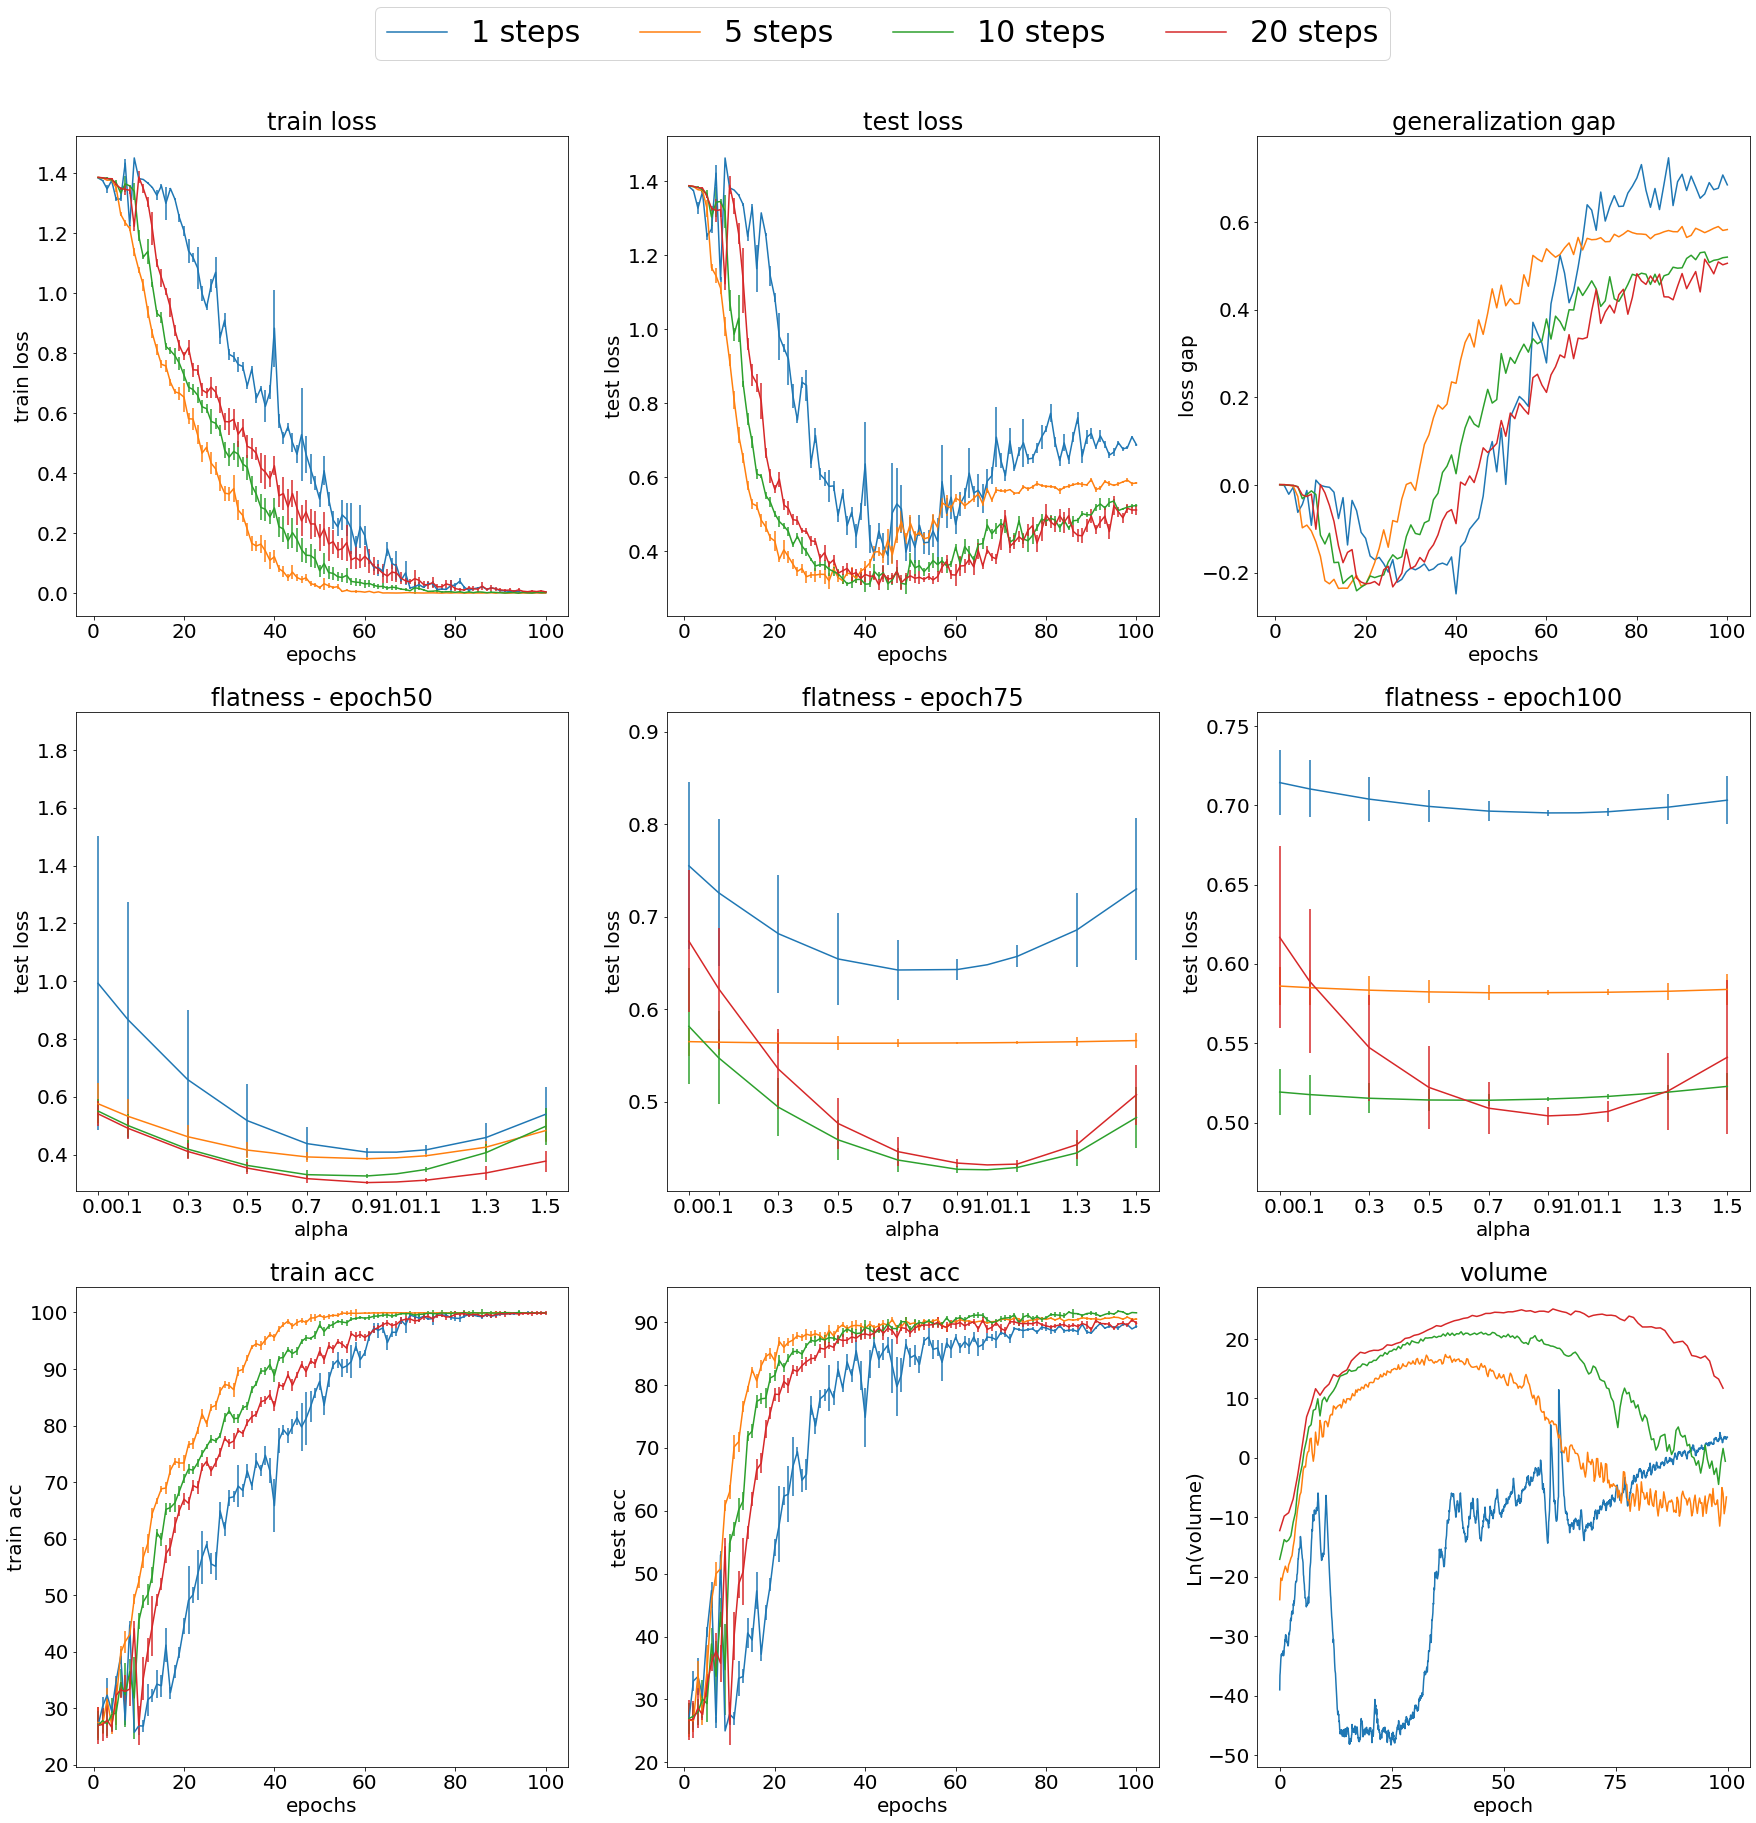

In [9]:
epochs = np.arange(100)+1
num_user = 10
dataset = 'retina'
eval_data_size = 100
model = 'retina'
total_data_num = 2000
num_step_list = [1,5,10,20]
batch_size = 100
total_step = int(total_data_num / batch_size)
comm_round_list = [[19],[3],[1],[0]]
num_step = [1,5,10,20]

plt.rcParams.update({'font.size': 20})
preset_fig_size = (30,30)
fig = plt.figure(figsize=preset_fig_size)

step_epoch = [45,70,95]
alpha_list = [0,0.1,0.3,0.5,0.7,0.9,1,1.1,1.3,1.5]
alpha_list = np.array(alpha_list)
flat_all_acc = []
flat_all_loss = []

train_acc = []
test_acc = []
test_loss = []
train_loss = []

for this_num_step,this_comm_round_list in zip(num_step_list,comm_round_list):
    return_train_acc,return_test_acc,return_train_loss,return_test_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                                                             num_step=this_num_step,comm_round_list=this_comm_round_list,exptype='simplex',new_name_style=True)
    train_acc.append(return_train_acc)
    test_acc.append(return_test_acc)
    train_loss.append(return_train_loss)
    test_loss.append(return_test_loss)

train_acc = np.array(train_acc)
test_acc = np.array(test_acc)
test_loss = np.array(test_loss)
train_loss = np.array(train_loss)


plt.subplot(3,3,1)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_loss[idx,:,0],yerr=train_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.title('train loss')

plt.subplot(3,3,2)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_loss[idx,:,0],yerr=test_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test loss')
plt.title('test loss')

plt.subplot(3,3,3)
for idx,this_num_step in enumerate(num_step_list):
    plt.plot(epochs,test_loss[idx,:,0]-train_loss[idx,:,0])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('loss gap')
plt.title('generalization gap')

    
for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
    all_acc,all_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                            num_step=this_num_step,comm_round_list=this_comm_round_list,exptype='flatness',new_name_style=True)
    
    flat_all_acc.append(all_acc)
    flat_all_loss.append(all_loss)

flat_all_acc = np.array(flat_all_acc)
flat_all_loss = np.array(flat_all_loss)

for epoch_idx,this_epoch in enumerate(step_epoch):
    plt.subplot(3,3,epoch_idx+4)
    loss_ylim_max = np.amax(flat_all_loss[:,this_epoch,:,:,1])+0.01
    loss_ylim_min = np.amin(flat_all_loss[:,this_epoch,:,:,1])-0.01
    for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
        this_epoch_test_loss = flat_all_loss[idx,this_epoch,:,:,1]
        plt.errorbar(alpha_list,np.average(this_epoch_test_loss,axis=0),yerr=np.sqrt(np.var(this_epoch_test_loss,axis=0)))
    plt.xlabel('alpha')
    plt.xticks(alpha_list)
    plt.title(f'flatness - epoch{this_epoch+5}')
    plt.ylabel('test loss')
    #plt.legend([str(num)+' steps' for num in num_step_list])
    plt.ylim(loss_ylim_min,loss_ylim_max)
    

plt.subplot(3,3,7)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train acc')
plt.title('train acc')

plt.subplot(3,3,8)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test acc')
plt.title('test acc')
    
plt.subplot(3,3,9)
## volume
for idx,this_step in enumerate(num_step):
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    plt.plot(np.arange(len(this_volume))*(this_step),np.log(this_volume[:,1]))
    
plt.xticks(ticks=[0,500,1000,1500,2000],labels=[0,25,50,75,100])
plt.xlabel('epoch')
plt.ylabel('Ln(volume)')
plt.title('volume')
plt.legend([str(num)+' steps' for num in num_step_list],bbox_to_anchor=(0.3,3.7),ncol=4,prop={'size': 30})
plt.savefig(f'{dataset}_step_summary.pdf',dpi=800,bbox_inches='tight')


69.47
69.06699999999998
68.797
68.704


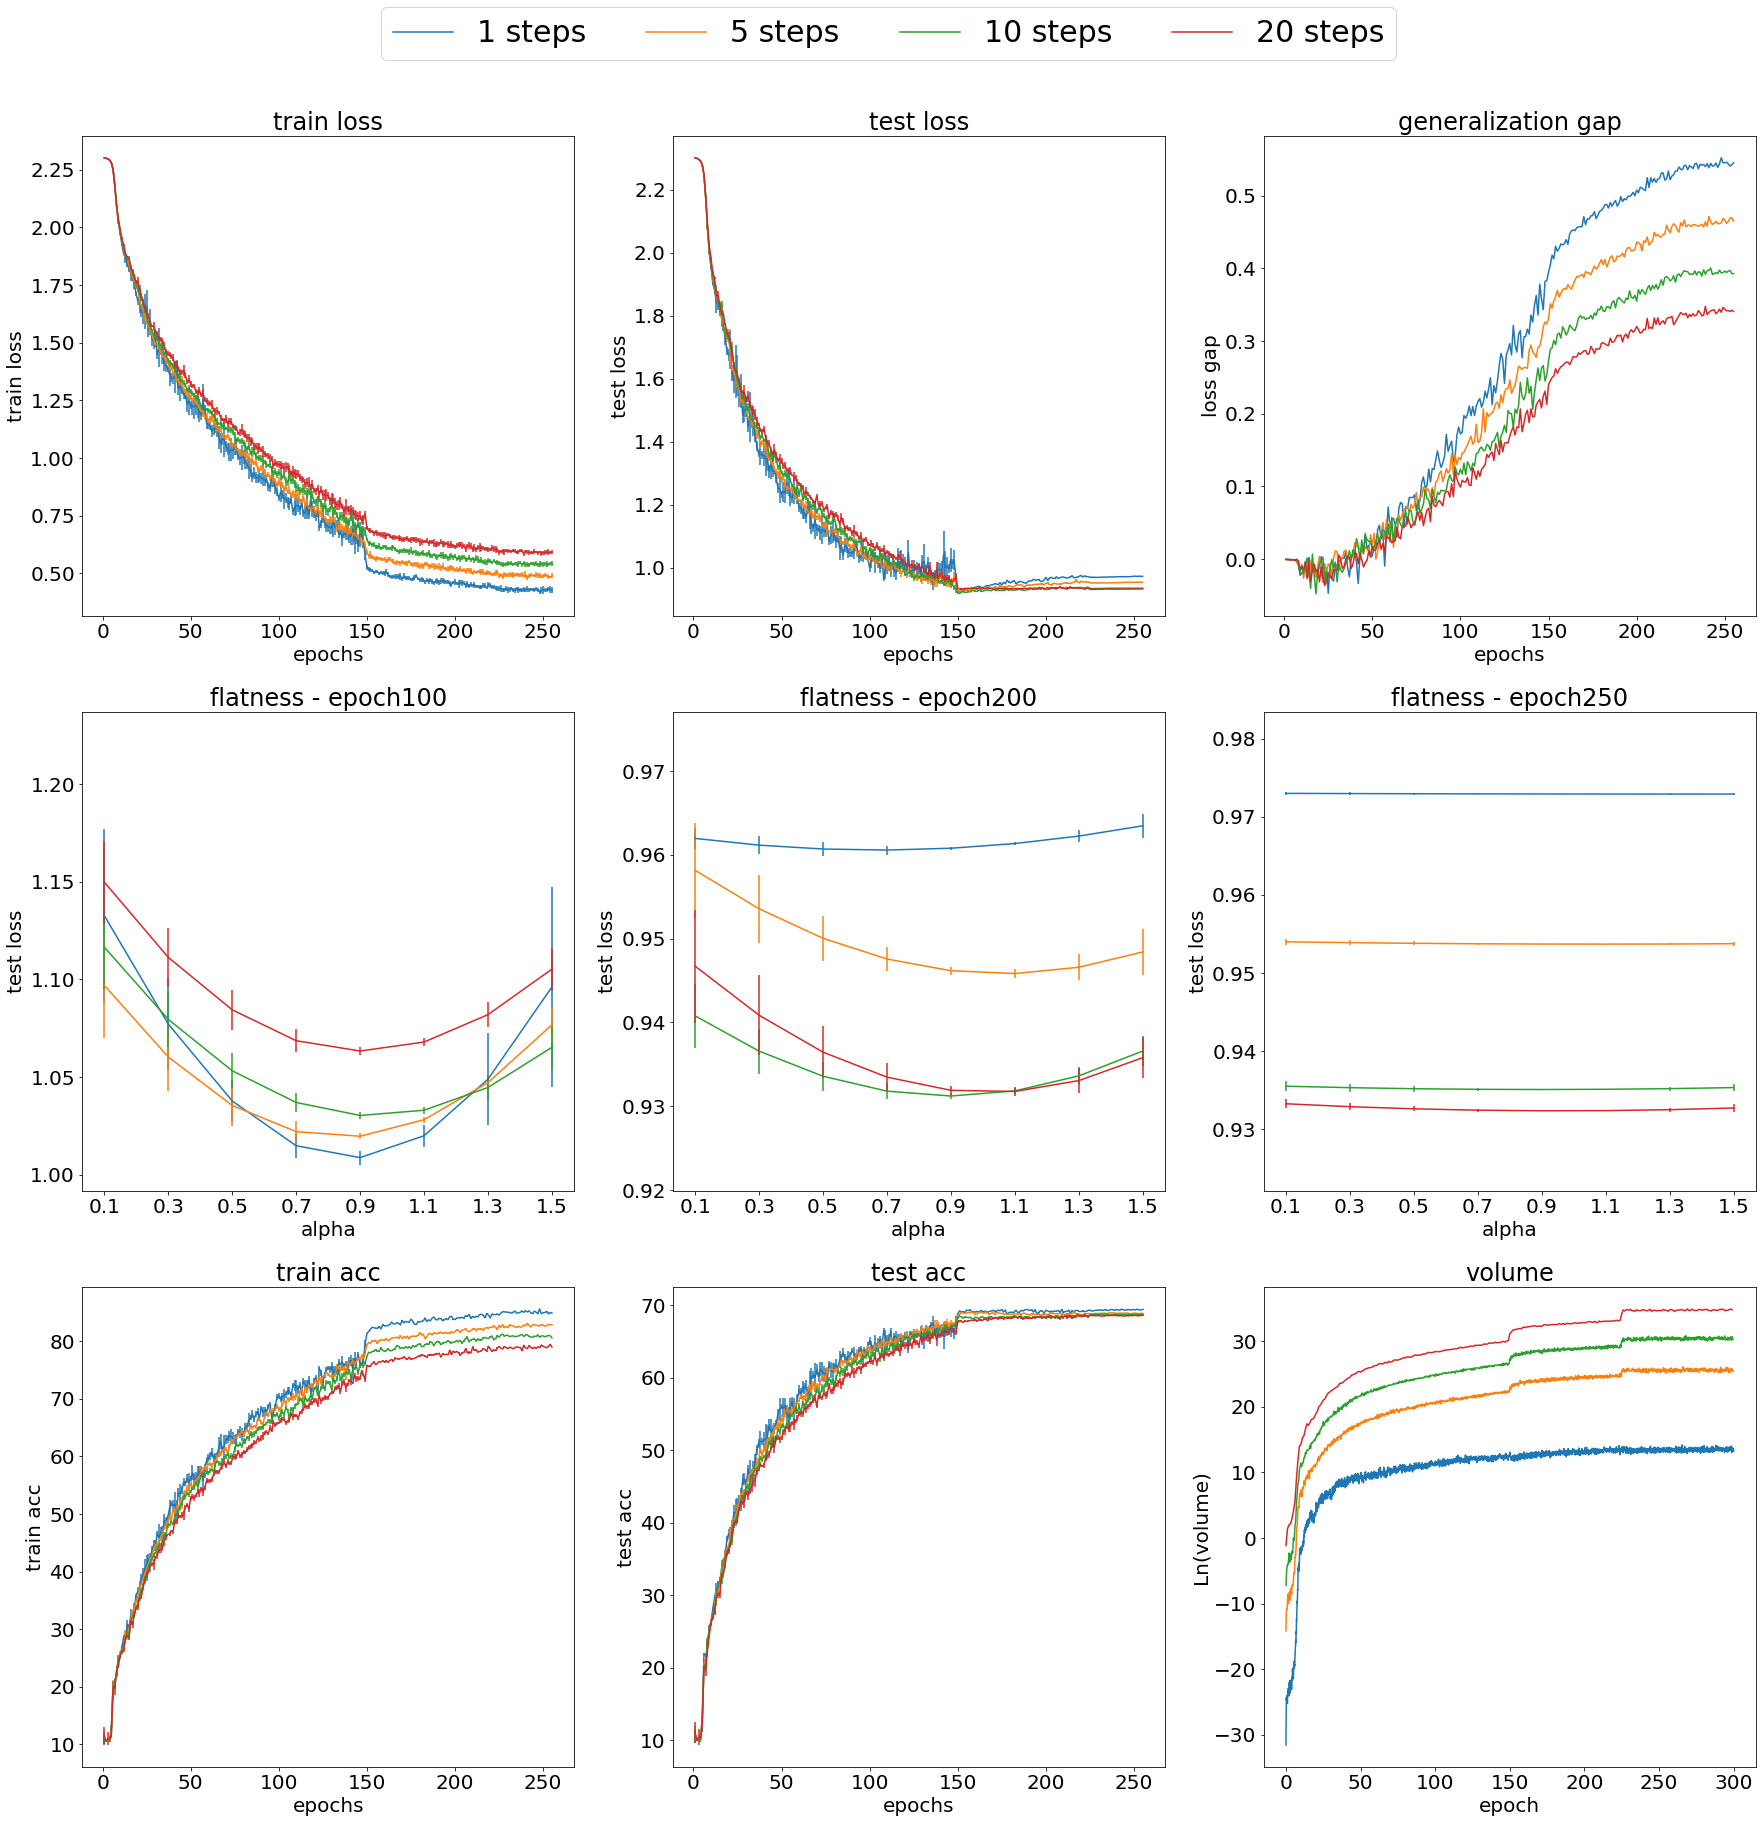

In [111]:
epochs = np.arange(255)+1
num_user = 8
dataset = 'cifar10'
eval_data_size = 50
model = 'alexnet'
total_data_num = 2000
num_step_list = [1,5,10,20]
batch_size = 100
total_step = int(total_data_num / batch_size)
comm_round_list = [[19],[3],[1],[0]]
num_step = [1,5,10,20]

plt.rcParams.update({'font.size': 20})
preset_fig_size = (30,30)
fig = plt.figure(figsize=preset_fig_size)

step_epoch = [100,200,250]
alpha_list = [0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5]
alpha_list = np.array(alpha_list)
flat_all_acc = []
flat_all_loss = []

train_acc = []
test_acc = []
test_loss = []
train_loss = []

for this_num_step,this_comm_round_list in zip(num_step_list,comm_round_list):
    return_train_acc,return_test_acc,return_train_loss,return_test_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                                                             num_step=this_num_step,comm_round_list=this_comm_round_list,exptype='simplex')
    train_acc.append(return_train_acc)
    test_acc.append(return_test_acc)
    train_loss.append(return_train_loss)
    test_loss.append(return_test_loss)
    
    print (np.amax(return_test_acc[:,0]))
    
train_acc = np.array(train_acc)
test_acc = np.array(test_acc)
test_loss = np.array(test_loss)
train_loss = np.array(train_loss)


plt.subplot(3,3,1)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_loss[idx,:,0],yerr=train_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.title('train loss')

plt.subplot(3,3,2)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_loss[idx,:,0],yerr=test_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test loss')
plt.title('test loss')

plt.subplot(3,3,3)
for idx,this_num_step in enumerate(num_step_list):
    plt.plot(epochs,test_loss[idx,:,0]-train_loss[idx,:,0])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('loss gap')
plt.title('generalization gap')

    
for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
    all_acc,all_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                            num_step=this_num_step,comm_round_list=this_comm_round_list,exptype='flatness')
    
    flat_all_acc.append(all_acc)
    flat_all_loss.append(all_loss)

flat_all_acc = np.array(flat_all_acc)
flat_all_loss = np.array(flat_all_loss)

for epoch_idx,this_epoch in enumerate(step_epoch):
    plt.subplot(3,3,epoch_idx+4)
    loss_ylim_max = np.amax(flat_all_loss[:,this_epoch,:,:,1])+0.01
    loss_ylim_min = np.amin(flat_all_loss[:,this_epoch,:,:,1])-0.01
    for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
        this_epoch_test_loss = flat_all_loss[idx,this_epoch,:,:,1]
        plt.errorbar(alpha_list,np.average(this_epoch_test_loss,axis=0),yerr=np.sqrt(np.var(this_epoch_test_loss,axis=0)))
    plt.xlabel('alpha')
    plt.xticks(alpha_list)
    plt.title(f'flatness - epoch{this_epoch}')
    plt.ylabel('test loss')
    #plt.legend([str(num)+' steps' for num in num_step_list])
    plt.ylim(loss_ylim_min,loss_ylim_max)
    

plt.subplot(3,3,7)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train acc')
plt.title('train acc')

plt.subplot(3,3,8)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test acc')
plt.title('test acc')
    
plt.subplot(3,3,9)
## volume
for idx,this_step in enumerate(num_step):
    file_name = file_prefix+'volume_10_'+str(this_step)+'_cifar10_2000_alexnet.npy'
    this_volume = np.load(file_name)
    plt.plot(np.arange(len(this_volume))*(this_step),np.log(this_volume[:,1]))
    
plt.xticks(ticks=[0,1000,2000,3000,4000,5000,6000],labels=[0,50,100,150,200,250,300])
plt.xlabel('epoch')
plt.ylabel('Ln(volume)')
plt.title('volume')
plt.legend([str(num)+' steps' for num in num_step_list],bbox_to_anchor=(0.3,3.7),ncol=4,prop={'size': 30})
plt.savefig('cifar10_step_summary.pdf',dpi=800,bbox_inches='tight')


83.08 78.332 0.46135233143856436 0.6511917133714714


ValueError: 'x' and 'y' must have the same size

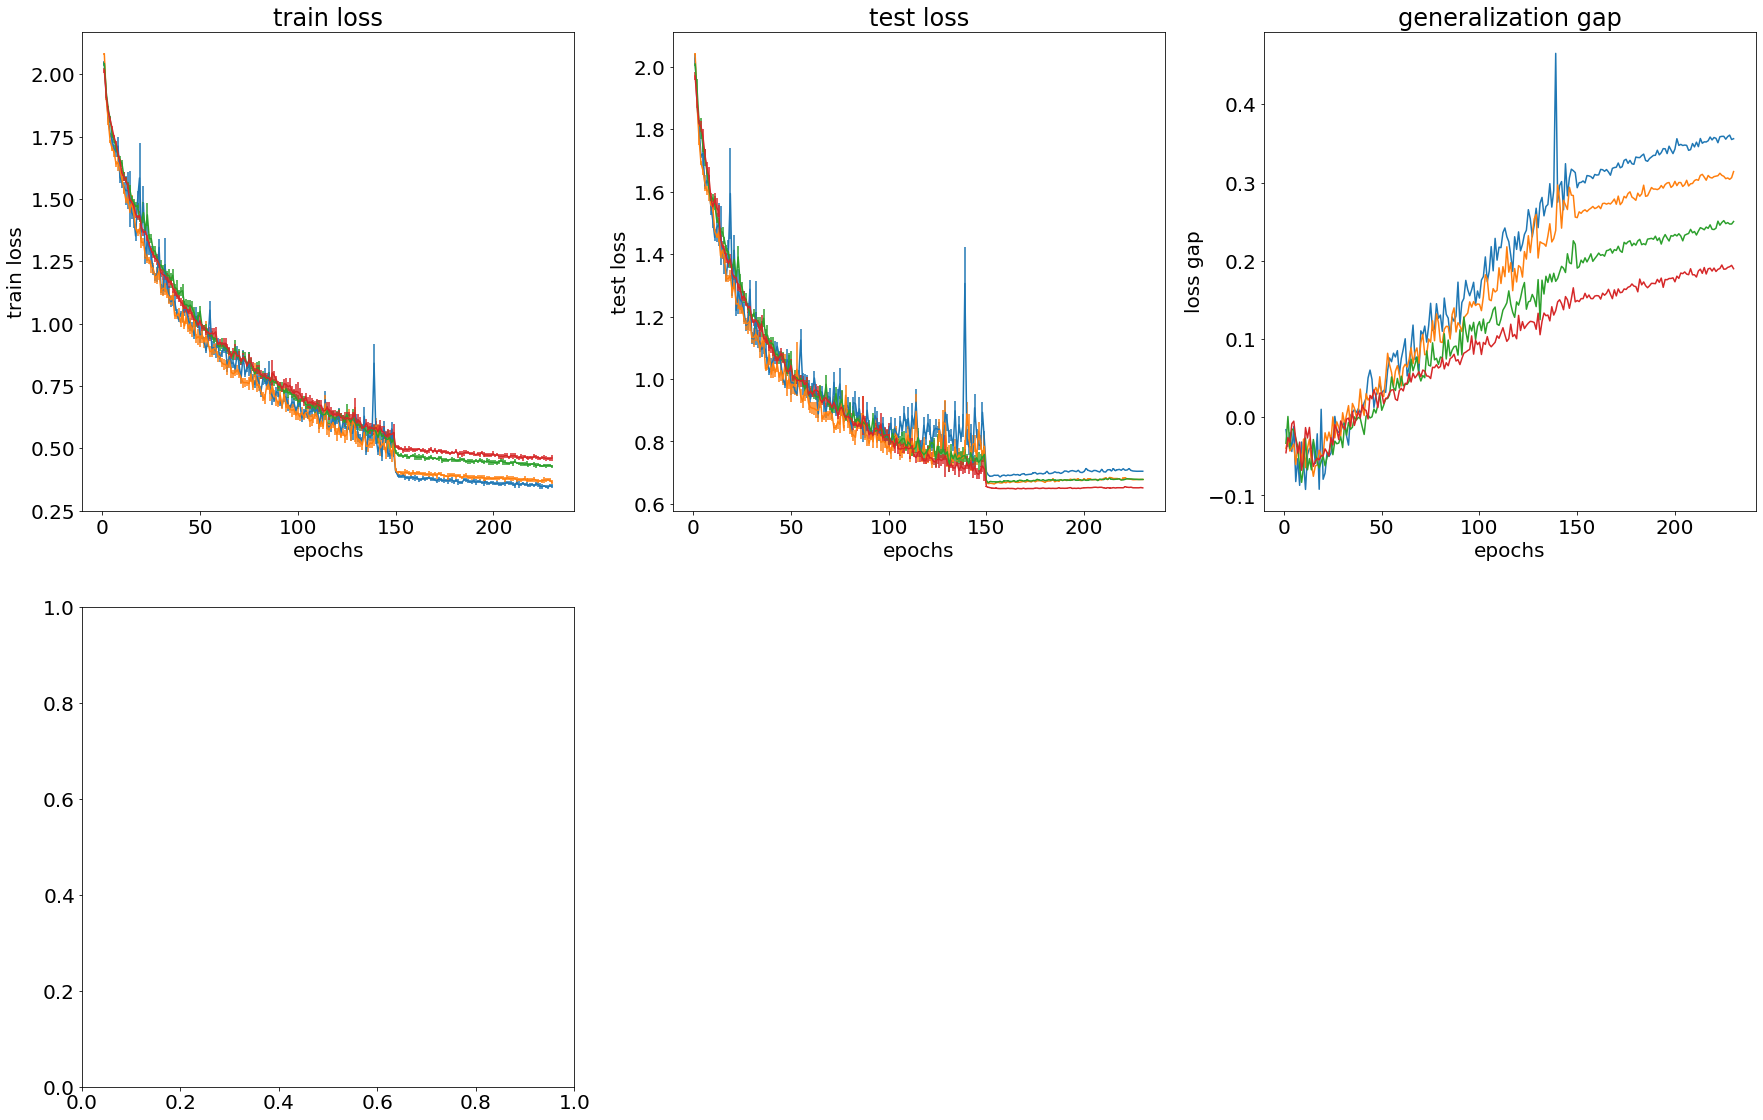

In [70]:
epochs = np.arange(230)+1
num_user = 10
dataset = 'cifar10'
eval_data_size = 50
model = 'resnet20'
total_data_num = 2000
num_step_list = [1,5,10,20]
batch_size = 100
total_step = int(total_data_num / batch_size)
comm_round_list = [[19],[3],[1],[0]]
num_step = [1,5,10,20]

plt.rcParams.update({'font.size': 20})
preset_fig_size = (30,30)
fig = plt.figure(figsize=preset_fig_size)

step_epoch = [100,200,250]
alpha_list = [0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5]
alpha_list = np.array(alpha_list)
flat_all_acc = []
flat_all_loss = []

train_acc = []
test_acc = []
test_loss = []
train_loss = []

for this_num_step,this_comm_round_list in zip(num_step_list,comm_round_list):
    return_train_acc,return_test_acc,return_train_loss,return_test_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                                                             num_step=this_num_step,comm_round_list=this_comm_round_list,new_name_style=True,exptype='simplex')
    train_acc.append(return_train_acc)
    test_acc.append(return_test_acc)
    train_loss.append(return_train_loss)
    test_loss.append(return_test_loss)

train_acc = np.array(train_acc)
test_acc = np.array(test_acc)
test_loss = np.array(test_loss)
train_loss = np.array(train_loss)

print (train_acc[-1,-1,0],test_acc[-1,-1,0],train_loss[-1,-1,0],test_loss[-1,-1,0])

plt.subplot(3,3,1)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_loss[idx,:,0],yerr=train_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.title('train loss')

plt.subplot(3,3,2)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_loss[idx,:,0],yerr=test_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test loss')
plt.title('test loss')

plt.subplot(3,3,3)
for idx,this_num_step in enumerate(num_step_list):
    plt.plot(epochs,test_loss[idx,:,0]-train_loss[idx,:,0])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('loss gap')
plt.title('generalization gap')

    
for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
    all_acc,all_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                            num_step=this_num_step,comm_round_list=this_comm_round_list,exptype='flatness',new_name_style=True)
    
    flat_all_acc.append(all_acc)
    flat_all_loss.append(all_loss)

flat_all_acc = np.array(flat_all_acc)
flat_all_loss = np.array(flat_all_loss)

for epoch_idx,this_epoch in enumerate(step_epoch):
    plt.subplot(3,3,epoch_idx+4)
    loss_ylim_max = np.amax(flat_all_loss[:,this_epoch,:,:,1])+0.01
    loss_ylim_min = np.amin(flat_all_loss[:,this_epoch,:,:,1])-0.01
    for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
        this_epoch_test_loss = flat_all_loss[idx,this_epoch,:,:,1]
        plt.errorbar(alpha_list,np.average(this_epoch_test_loss,axis=0),yerr=np.sqrt(np.var(this_epoch_test_loss,axis=0)))
    plt.xlabel('alpha')
    plt.xticks(alpha_list)
    plt.title(f'flatness - epoch{this_epoch}')
    plt.ylabel('test loss')
    #plt.legend([str(num)+' steps' for num in num_step_list])
    plt.ylim(loss_ylim_min,loss_ylim_max)
    

plt.subplot(3,3,7)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train acc')
plt.title('train acc')

plt.subplot(3,3,8)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test acc')
plt.title('test acc')
    
plt.subplot(3,3,9)
## volume
for idx,this_step in enumerate(num_step):
    file_name = file_prefix+'volume_10_'+str(this_step)+'_cifar10_2000_alexnet.npy'
    this_volume = np.load(file_name)
    plt.plot(np.arange(len(this_volume))*(this_step),np.log(this_volume[:,1]))
    
plt.xticks(ticks=[0,1000,2000,3000,4000,5000,6000],labels=[0,50,100,150,200,250,300])
plt.xlabel('epoch')
plt.ylabel('Ln(volume)')
plt.title('volume')
plt.legend([str(num)+' steps' for num in num_step_list],bbox_to_anchor=(0.3,3.7),ncol=4,prop={'size': 30})
plt.savefig('cifar10_step_summary.pdf',dpi=800,bbox_inches='tight')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jclialex/PycharmProjects/whiteboxmi_expdata/expdata/simplex/flatness_test_acc_10_1_164_1_19_cifar10_2000_50_alexnet.npy'

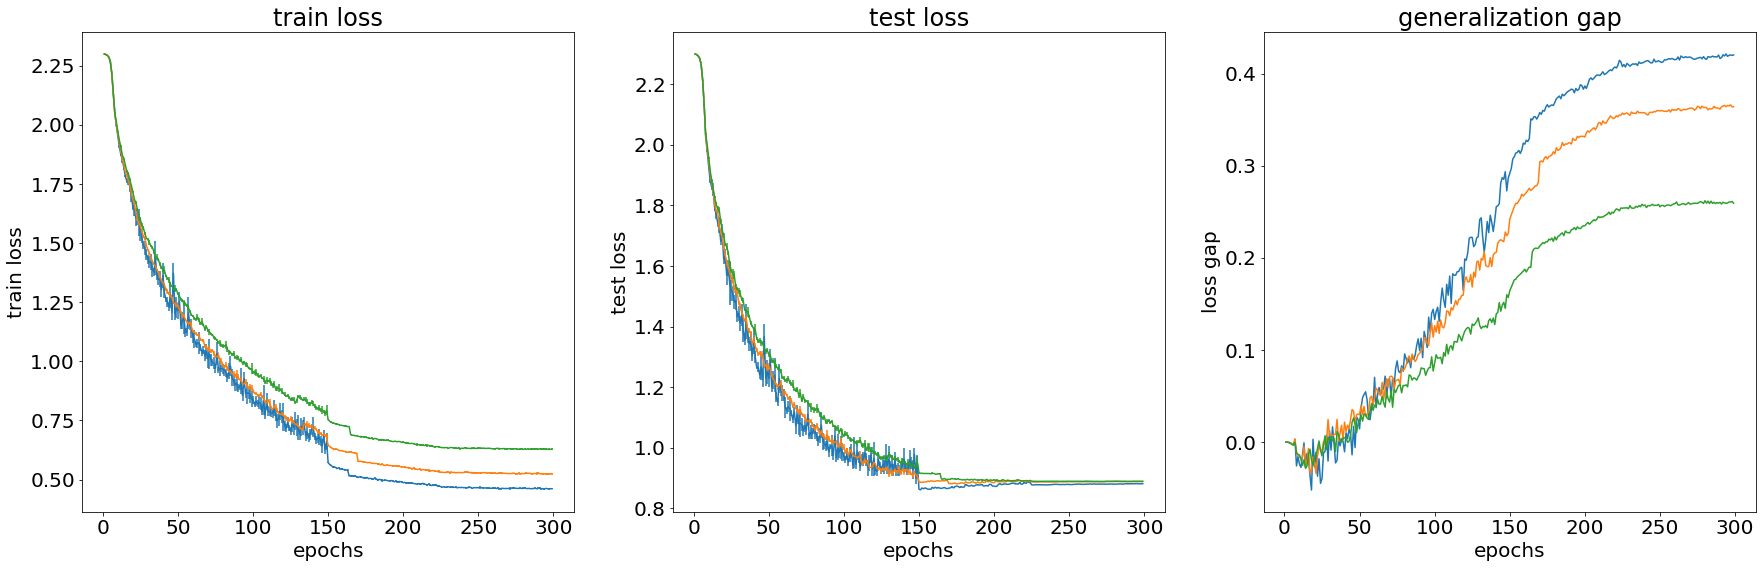

In [168]:
epochs = np.arange(299)+1
num_user = 10
dataset = 'cifar10'
eval_data_size = 50
model = 'alexnet'
total_data_num = 2000
#num_step_list = [1,5,10,20]
batch_size = 100
total_step = int(total_data_num / batch_size)
#comm_round_list = [[19],[3],[1],[0]]
#num_step = [1,5,10,20]
num_step_list = [1,5,20]
comm_round_list = [[19],[3],[0]]

plt.rcParams.update({'font.size': 20})
preset_fig_size = (30,30)
fig = plt.figure(figsize=preset_fig_size)

step_epoch = [100,200,250]
alpha_list = [0,0.1,0.3,0.5,0.7,0.9,1,1.1,1.3,1.5]
alpha_list = np.array(alpha_list)
flat_all_acc = []
flat_all_loss = []

train_acc = []
test_acc = []
test_loss = []
train_loss = []

for this_num_step,this_comm_round_list in zip(num_step_list,comm_round_list):
    return_train_acc,return_test_acc,return_train_loss,return_test_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                                                             num_step=this_num_step,comm_round_list=this_comm_round_list,new_name_style=True,exptype='simplex')
    train_acc.append(return_train_acc)
    test_acc.append(return_test_acc)
    train_loss.append(return_train_loss)
    test_loss.append(return_test_loss)

train_acc = np.array(train_acc)
test_acc = np.array(test_acc)
test_loss = np.array(test_loss)
train_loss = np.array(train_loss)


plt.subplot(3,3,1)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_loss[idx,:,0],yerr=train_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.title('train loss')

plt.subplot(3,3,2)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_loss[idx,:,0],yerr=test_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test loss')
plt.title('test loss')

plt.subplot(3,3,3)
for idx,this_num_step in enumerate(num_step_list):
    plt.plot(epochs,test_loss[idx,:,0]-train_loss[idx,:,0])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('loss gap')
plt.title('generalization gap')

    
for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
    all_acc,all_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                            num_step=this_num_step,comm_round_list=this_comm_round_list,exptype='flatness',new_name_style=True)
    
    flat_all_acc.append(all_acc)
    flat_all_loss.append(all_loss)

flat_all_acc = np.array(flat_all_acc)
flat_all_loss = np.array(flat_all_loss)

for epoch_idx,this_epoch in enumerate(step_epoch):
    plt.subplot(3,3,epoch_idx+4)
    loss_ylim_max = np.amax(flat_all_loss[:,this_epoch,:,:,1])+0.01
    loss_ylim_min = np.amin(flat_all_loss[:,this_epoch,:,:,1])-0.01
    for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
        this_epoch_test_loss = flat_all_loss[idx,this_epoch,:,:,1]
        plt.errorbar(alpha_list,np.average(this_epoch_test_loss,axis=0),yerr=np.sqrt(np.var(this_epoch_test_loss,axis=0)))
    plt.xlabel('alpha')
    plt.xticks(alpha_list)
    plt.title(f'flatness - epoch{this_epoch}')
    plt.ylabel('test loss')
    #plt.legend([str(num)+' steps' for num in num_step_list])
    plt.ylim(loss_ylim_min,loss_ylim_max)
    

plt.subplot(3,3,7)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train acc')
plt.title('train acc')

plt.subplot(3,3,8)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test acc')
plt.title('test acc')
    
plt.subplot(3,3,9)
## volume
for idx,this_step in enumerate(num_step_list):
    file_name = file_prefix+'volume_10_'+str(this_step)+'_cifar10_2000_alexnet.npy'
    this_volume = np.load(file_name)
    plt.plot(np.arange(len(this_volume))*(this_step),np.log(this_volume[:,1]))
    
plt.xticks(ticks=[0,1000,2000,3000,4000,5000,6000],labels=[0,50,100,150,200,250,300])
plt.xlabel('epoch')
plt.ylabel('Ln(volume)')
plt.title('volume')
plt.legend([str(num)+' steps' for num in num_step_list],bbox_to_anchor=(0.3,3.7),ncol=4,prop={'size': 30})
plt.savefig('cifar10_step_summary.pdf',dpi=800,bbox_inches='tight')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jclialex/PycharmProjects/whiteboxmi_expdata/expdata/simplex/flatness_test_acc_5_1_2_1_9_gtsrb_1000_50_gtsrb.npy'

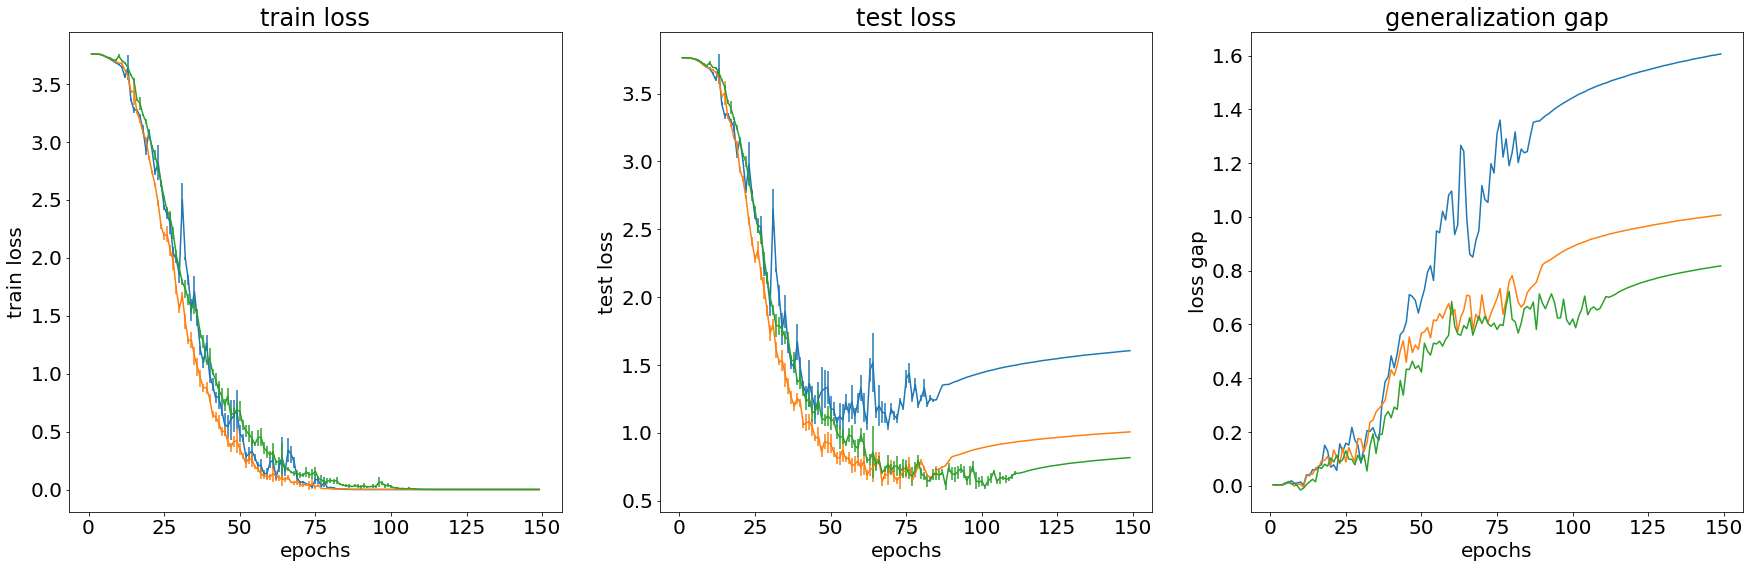

In [72]:
epochs = np.arange(149)+1
num_user = 5
dataset = 'gtsrb'
eval_data_size = 50
model = 'gtsrb'
total_data_num = 1000
#num_step_list = [1,5,10,20]
batch_size = 100
total_step = int(total_data_num / batch_size)
#comm_round_list = [[19],[3],[1],[0]]
#num_step = [1,5,10,20]
num_step_list = [1,5,10]
comm_round_list = [[9],[1],[0]]

plt.rcParams.update({'font.size': 20})
preset_fig_size = (30,30)
fig = plt.figure(figsize=preset_fig_size)

step_epoch = [45,95,145]
alpha_list = [0,0.1,0.3,0.5,0.7,0.9,1,1.1,1.3,1.5]
alpha_list = np.array(alpha_list)
flat_all_acc = []
flat_all_loss = []

train_acc = []
test_acc = []
test_loss = []
train_loss = []

for this_num_step,this_comm_round_list in zip(num_step_list,comm_round_list):
    return_train_acc,return_test_acc,return_train_loss,return_test_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                                                             num_step=this_num_step,comm_round_list=this_comm_round_list,new_name_style=True,exptype='simplex')
    train_acc.append(return_train_acc)
    test_acc.append(return_test_acc)
    train_loss.append(return_train_loss)
    test_loss.append(return_test_loss)

train_acc = np.array(train_acc)
test_acc = np.array(test_acc)
test_loss = np.array(test_loss)
train_loss = np.array(train_loss)


plt.subplot(3,3,1)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_loss[idx,:,0],yerr=train_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.title('train loss')

plt.subplot(3,3,2)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_loss[idx,:,0],yerr=test_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test loss')
plt.title('test loss')

plt.subplot(3,3,3)
for idx,this_num_step in enumerate(num_step_list):
    plt.plot(epochs,test_loss[idx,:,0]-train_loss[idx,:,0])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('loss gap')
plt.title('generalization gap')

    
for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
    all_acc,all_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                            num_step=this_num_step,comm_round_list=this_comm_round_list,exptype='flatness',new_name_style=True)
    
    flat_all_acc.append(all_acc)
    flat_all_loss.append(all_loss)

flat_all_acc = np.array(flat_all_acc)
flat_all_loss = np.array(flat_all_loss)

for epoch_idx,this_epoch in enumerate(step_epoch):
    plt.subplot(3,3,epoch_idx+4)
    loss_ylim_max = np.amax(flat_all_loss[:,this_epoch,:,:,1])+0.01
    loss_ylim_min = np.amin(flat_all_loss[:,this_epoch,:,:,1])-0.01
    for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
        this_epoch_test_loss = flat_all_loss[idx,this_epoch,:,:,1]
        plt.errorbar(alpha_list,np.average(this_epoch_test_loss,axis=0),yerr=np.sqrt(np.var(this_epoch_test_loss,axis=0)))
    plt.xlabel('alpha')
    plt.xticks(alpha_list)
    plt.title(f'flatness - epoch{this_epoch}')
    plt.ylabel('test loss')
    #plt.legend([str(num)+' steps' for num in num_step_list])
    plt.ylim(loss_ylim_min,loss_ylim_max)
    

plt.subplot(3,3,7)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train acc')
plt.title('train acc')

plt.subplot(3,3,8)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test acc')
plt.title('test acc')
    
plt.subplot(3,3,9)
## volume
for idx,this_step in enumerate(num_step_list):
    file_name = file_prefix+'volume_10_'+str(this_step)+'_cifar10_2000_alexnet.npy'
    this_volume = np.load(file_name)
    plt.plot(np.arange(len(this_volume))*(this_step),np.log(this_volume[:,1]))
    
plt.xticks(ticks=[0,1000,2000,3000,4000,5000,6000],labels=[0,50,100,150,200,250,300])
plt.xlabel('epoch')
plt.ylabel('Ln(volume)')
plt.title('volume')
plt.legend([str(num)+' steps' for num in num_step_list],bbox_to_anchor=(0.3,3.7),ncol=4,prop={'size': 30})
plt.savefig('cifar10_step_summary.pdf',dpi=800,bbox_inches='tight')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jclialex/PycharmProjects/whiteboxmi_expdata/expdata/simplex/flatness_test_acc_10_1_2_1_9_intel_1000_50_intel.npy'

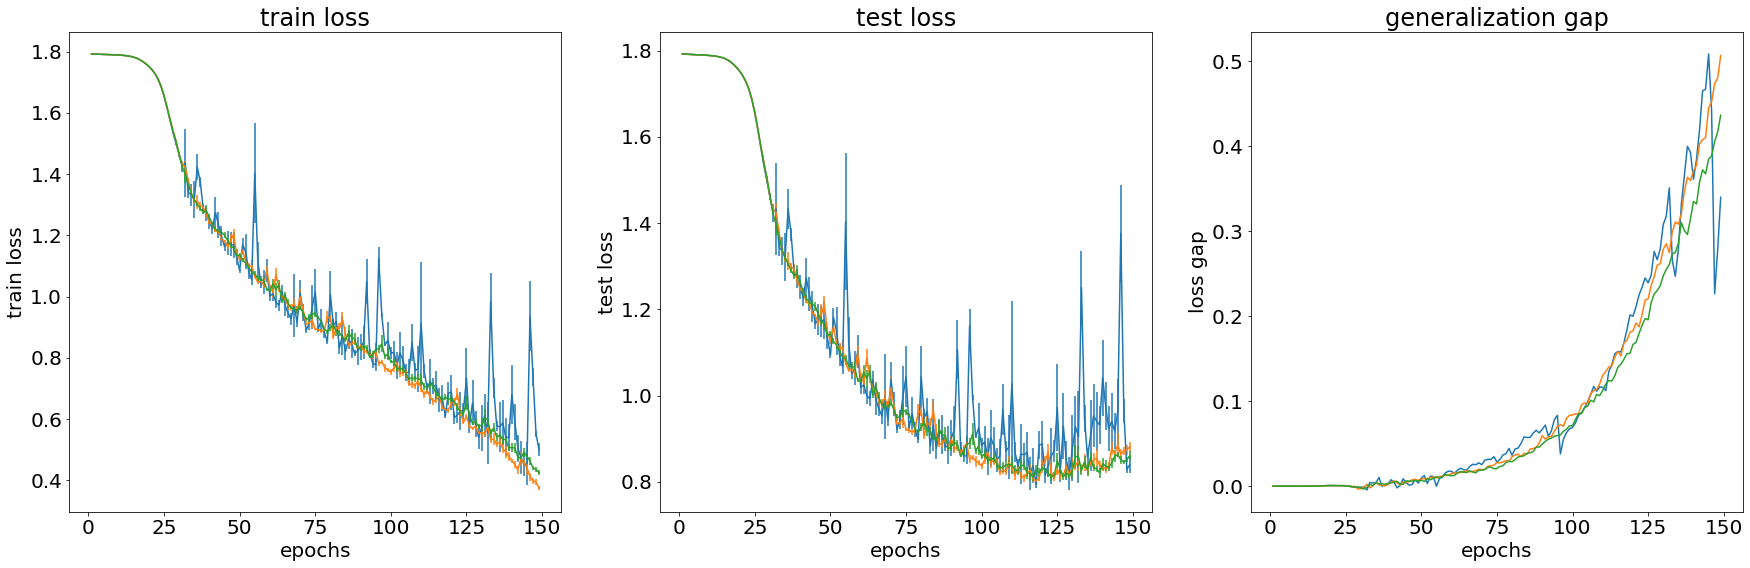

In [129]:
epochs = np.arange(149)+1
num_user = 10
dataset = 'intel'
eval_data_size = 50
model = 'intel'
total_data_num = 1000
#num_step_list = [1,5,10,20]
batch_size = 100
total_step = int(total_data_num / batch_size)
#comm_round_list = [[19],[3],[1],[0]]
#num_step = [1,5,10,20]
num_step_list = [1,5,10]
comm_round_list = [[9],[1],[0]]

plt.rcParams.update({'font.size': 20})
preset_fig_size = (30,30)
fig = plt.figure(figsize=preset_fig_size)

step_epoch = [50,70,90]
alpha_list = [0,0.1,0.3,0.5,0.7,0.9,1,1.1,1.3,1.5]
alpha_list = np.array(alpha_list)
flat_all_acc = []
flat_all_loss = []

train_acc = []
test_acc = []
test_loss = []
train_loss = []

for this_num_step,this_comm_round_list in zip(num_step_list,comm_round_list):
    return_train_acc,return_test_acc,return_train_loss,return_test_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                                                             num_step=this_num_step,comm_round_list=this_comm_round_list,new_name_style=True,exptype='simplex')
    train_acc.append(return_train_acc)
    test_acc.append(return_test_acc)
    train_loss.append(return_train_loss)
    test_loss.append(return_test_loss)

train_acc = np.array(train_acc)
test_acc = np.array(test_acc)
test_loss = np.array(test_loss)
train_loss = np.array(train_loss)


plt.subplot(3,3,1)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_loss[idx,:,0],yerr=train_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.title('train loss')

plt.subplot(3,3,2)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_loss[idx,:,0],yerr=test_loss[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test loss')
plt.title('test loss')

plt.subplot(3,3,3)
for idx,this_num_step in enumerate(num_step_list):
    plt.plot(epochs,test_loss[idx,:,0]-train_loss[idx,:,0])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('loss gap')
plt.title('generalization gap')

    
for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
    all_acc,all_loss = analysis(epochs,num_user,dataset,total_data_num,eval_data_size,model,
                            num_step=this_num_step,comm_round_list=this_comm_round_list,exptype='flatness',new_name_style=True)
    
    flat_all_acc.append(all_acc)
    flat_all_loss.append(all_loss)

flat_all_acc = np.array(flat_all_acc)
flat_all_loss = np.array(flat_all_loss)

for epoch_idx,this_epoch in enumerate(step_epoch):
    plt.subplot(3,3,epoch_idx+4)
    loss_ylim_max = np.amax(flat_all_loss[:,this_epoch,:,:,1])+0.01
    loss_ylim_min = np.amin(flat_all_loss[:,this_epoch,:,:,1])-0.01
    for idx,(this_num_step,this_comm_round_list) in enumerate(zip(num_step_list,comm_round_list)):
        this_epoch_test_loss = flat_all_loss[idx,this_epoch,:,:,1]
        plt.errorbar(alpha_list,np.average(this_epoch_test_loss,axis=0),yerr=np.sqrt(np.var(this_epoch_test_loss,axis=0)))
    plt.xlabel('alpha')
    plt.xticks(alpha_list)
    plt.title(f'flatness - epoch{this_epoch}')
    plt.ylabel('test loss')
    #plt.legend([str(num)+' steps' for num in num_step_list])
    plt.ylim(loss_ylim_min,loss_ylim_max)
    

plt.subplot(3,3,7)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,train_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('train acc')
plt.title('train acc')

plt.subplot(3,3,8)
for idx,this_num_step in enumerate(num_step_list):
    plt.errorbar(epochs,test_acc[idx,:,0],yerr=test_acc[idx,:,1])
#plt.legend([str(num)+' steps' for num in num_step_list])
plt.xlabel('epochs')
plt.ylabel('test acc')
plt.title('test acc')
    
plt.subplot(3,3,9)
## volume
for idx,this_step in enumerate(num_step_list):
    file_name = file_prefix+'volume_10_'+str(this_step)+'_cifar10_2000_alexnet.npy'
    this_volume = np.load(file_name)
    plt.plot(np.arange(len(this_volume))*(this_step),np.log(this_volume[:,1]))
    
plt.xticks(ticks=[0,1000,2000,3000,4000,5000,6000],labels=[0,50,100,150,200,250,300])
plt.xlabel('epoch')
plt.ylabel('Ln(volume)')
plt.title('volume')
plt.legend([str(num)+' steps' for num in num_step_list],bbox_to_anchor=(0.3,3.7),ncol=4,prop={'size': 30})
plt.savefig('cifar10_step_summary.pdf',dpi=800,bbox_inches='tight')


89.63
(300, 3)
89.98
(600, 3)


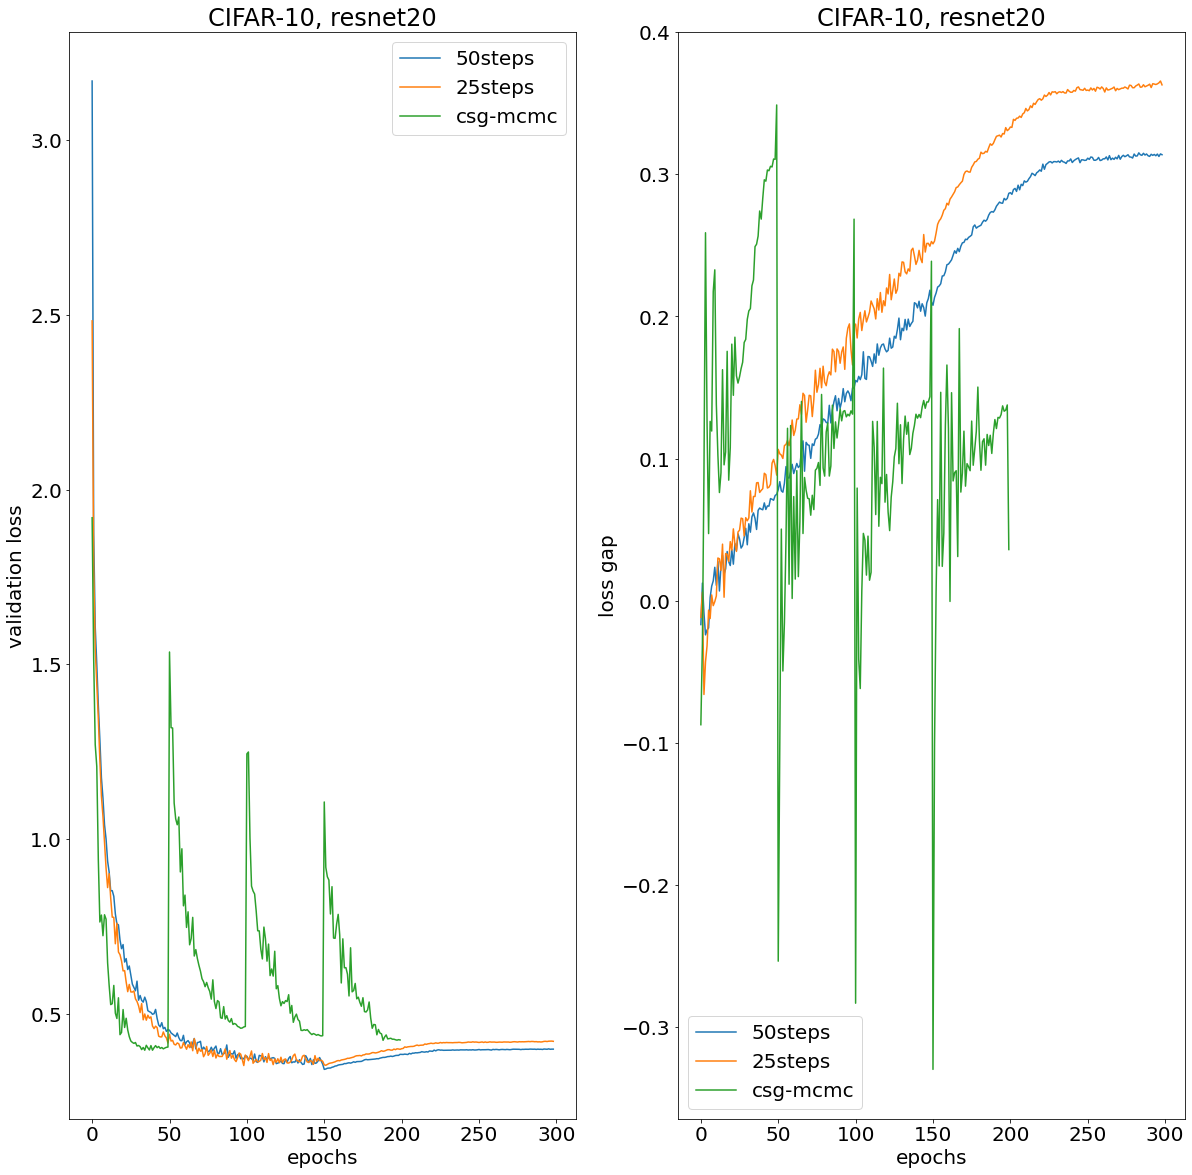

50 step result:
min test loss 0.38313221797943114
gap at this epoch 0.2859148229885101
train loss 0.09721739499092102
ECE loss 0.0487099215388298
test accuracy 89.63
25 step result:
min test loss 0.35219540309906006
gap at this epoch 0.25304014295578003
train loss 0.09915526014328004
ECE loss 0.041042983531951904
test accuracy 89.98
CSGMCMC results:
min test loss 0.39919341653585433
gap at this epoch 0.3051744292154908
train loss 0.09401898732036353
ECE loss 0.05386980623006821
test accuracy 89.64


Text(0.5, 0, 'epochs')

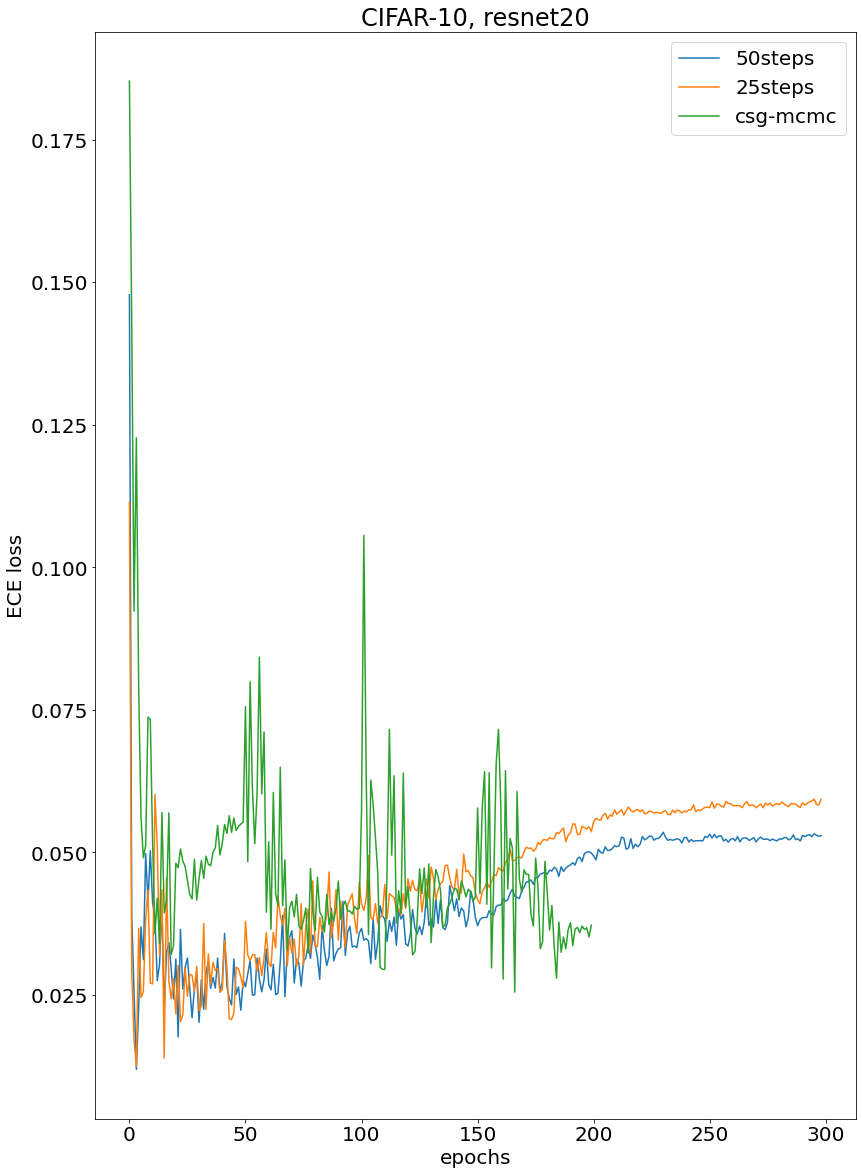

In [169]:
epochs = np.arange(230)+1
num_user = 10
dataset = 'cifar10'
eval_data_size = 50
model = 'resnet20'
total_data_num = 5000
#num_step_list = [1,5,10,20]
num_step_list = [50,25]
batch_size = 100
total_step = int(total_data_num / batch_size)

plt.rcParams.update({'font.size': 20})
preset_fig_size = (30,30)

all_step_loss = []
all_step_acc = []

for this_step in num_step_list:
    step_loss = np.load(file_prefix+f'loss_10_{this_step}_cifar10_5000_resnet20.npy')
    step_acc = np.load(file_prefix+f'acc_10_{this_step}_cifar10_5000_resnet20.npy')
    
    print (np.amax(step_acc[:,1]))
    print (step_loss.shape)
    selected_index = (np.arange(299)*int(50/this_step)).astype('int64')
    step_loss = step_loss[selected_index]
    step_acc = step_acc[selected_index]
    
    all_step_loss.append(step_loss)
    all_step_acc.append(step_acc)
    
all_step_loss = np.array(all_step_loss)
all_step_acc = np.array(all_step_acc)

    
mcmc_acc = np.load(file_prefix+'csgmcmc_cifar10_resnet20_0.5_acc.npy')
mcmc_loss = np.load(file_prefix+'csgmcmc_cifar10_resnet20_0.5_loss.npy')



fig = plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
for idx,this_step in enumerate(num_step_list):
    plt.plot(np.arange(len(all_step_loss[idx])),all_step_loss[idx,:,1])
plt.plot(np.arange(len(mcmc_loss)),mcmc_loss[:,1])
plt.legend([str(this_step)+"steps" for this_step in num_step_list]+['csg-mcmc'])
plt.title('CIFAR-10, resnet20')
plt.ylabel('validation loss')
plt.xlabel('epochs')

plt.subplot(1,2,2)
for idx,this_step in enumerate(num_step_list):
    plt.plot(np.arange(len(all_step_loss[idx])),all_step_loss[idx,:,1] - all_step_loss[idx,:,0])
plt.plot(np.arange(len(mcmc_loss)),mcmc_loss[:,1] - mcmc_loss[:,0])
plt.legend([str(this_step)+"steps"  for this_step in num_step_list]+['csg-mcmc'])
plt.title('CIFAR-10, resnet20')
plt.ylabel('loss gap')
plt.xlabel('epochs')
plt.show()


for i in range(len(num_step_list)):
    #min_idx = np.argmin((all_step_loss[i,:,1]))
    min_idx = np.argmax(all_step_acc[i,:,1])
    print (f"{num_step_list[i]} step result:")
    print (f"min test loss {all_step_loss[i,min_idx,1]}")
    print (f"gap at this epoch {all_step_loss[i,min_idx,1] - all_step_loss[i,min_idx,0]}")
    print (f"train loss {all_step_loss[i,min_idx,0]}")
    print (f"ECE loss {all_step_loss[i,min_idx,2]}")
    print (f"test accuracy {all_step_acc[i,min_idx,1]}")

    
min_idx = np.argmax((mcmc_acc[:,1]))
print ("CSGMCMC results:")
print (f"min test loss {mcmc_loss[min_idx,1]}")
print (f"gap at this epoch {mcmc_loss[min_idx,1] - mcmc_loss[min_idx,0]}")
print (f"train loss {mcmc_loss[min_idx,0]}")
print (f"ECE loss {mcmc_loss[min_idx,2]}")
print (f"test accuracy {mcmc_acc[min_idx,1]}")

fig = plt.figure(figsize=(30,20))
plt.subplot(1,2,1)
for idx,this_step in enumerate(num_step_list):
    plt.plot(np.arange(len(all_step_loss[idx])),all_step_loss[idx,:,2])
plt.plot(np.arange(len(mcmc_loss)),mcmc_loss[:,2])
plt.legend([str(this_step)+"steps" for this_step in num_step_list]+['csg-mcmc'])
plt.title('CIFAR-10, resnet20')
plt.ylabel('ECE loss')
plt.xlabel('epochs')

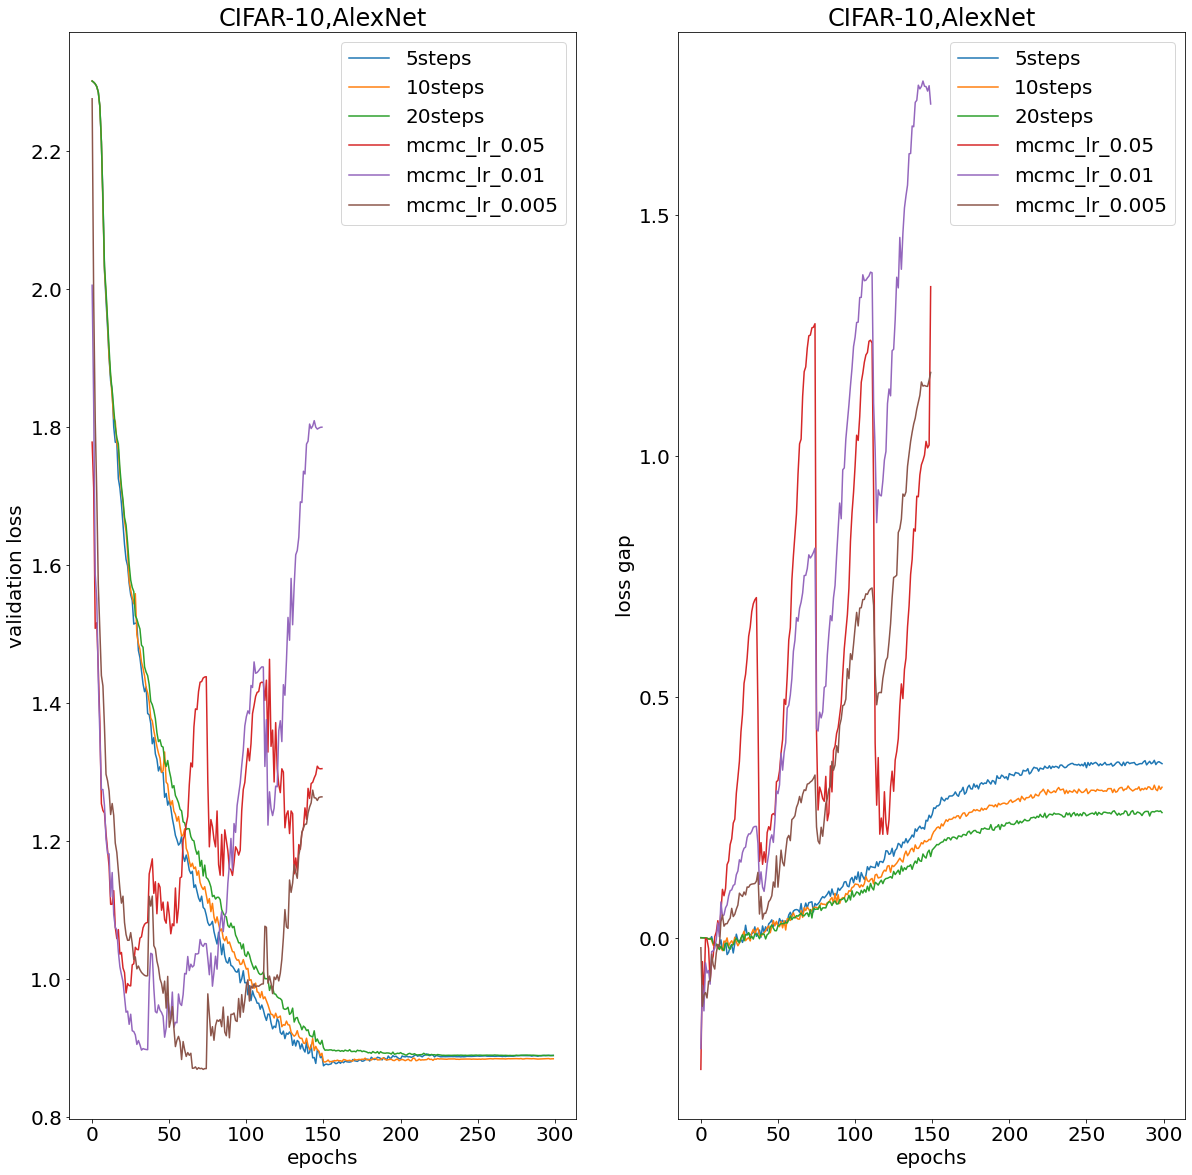

5 step result:
min test loss 0.8737333667755127
gap at this epoch 0.25642589550018313
train loss 0.6173074712753296
10 step result:
min test loss 0.8792815437316894
gap at this epoch 0.22030962104797358
train loss 0.6589719226837158
20 step result:
min test loss 0.8885131317138671
gap at this epoch 0.2624202276229858
train loss 0.6260929040908814
0.05 step result:
min test loss 0.9794127571582795
gap at this epoch 0.24622116848826414
train loss 0.7331915886700153
ECE loss 0.045195408165454865
0.01 step result:
min test loss 0.8965313351154327
gap at this epoch 0.2156737780570983
train loss 0.6808575570583344
ECE loss 0.037640493363142014
0.005 step result:
min test loss 0.868581553697586
gap at this epoch 0.32605414137244226
train loss 0.5425274123251438
ECE loss 0.057560473680496216


IndexError: index 2 is out of bounds for axis 2 with size 2

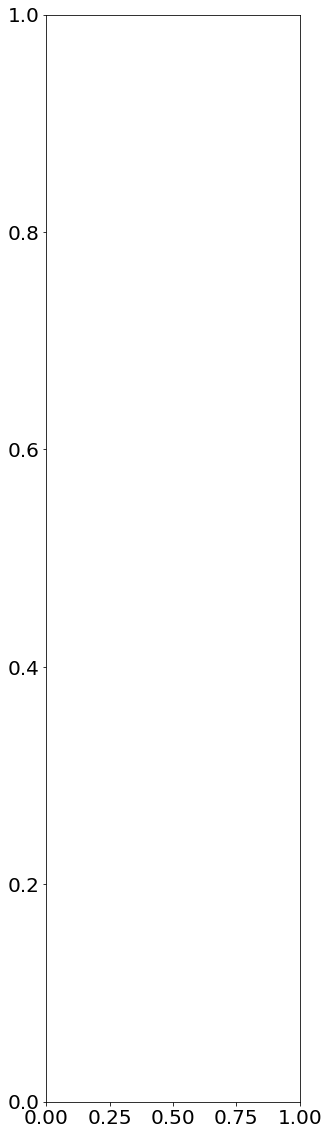

In [149]:
epochs = np.arange(230)+1
num_user = 10
dataset = 'cifar10'
eval_data_size = 50
model = 'alexnet'
total_data_num = 2000
#num_step_list = [1,5,10,20]
#num_step_list = [5,10,20]
num_step_list = [5,10,20]
batch_size = 100
total_step = int(total_data_num / batch_size)
comm_round_list = [[19],[3],[1],[0]]

#mcmc_lr_list = [0.05,0.02,0.01,0.005]
mcmc_lr_list = [0.05,0.01,0.005]


plt.rcParams.update({'font.size': 20})
preset_fig_size = (30,30)

all_step_loss = []
all_step_acc = []


for this_step in num_step_list:
    step_loss = np.load(file_prefix+f'loss_10_{this_step}_cifar10_2000_{model}.npy')
    step_acc = np.load(file_prefix+f'acc_10_{this_step}_cifar10_2000_{model}.npy')
    #print (step_loss.shape,step_acc.shape)
    all_step_loss.append(step_loss)
    all_step_acc.append(step_acc)
    
all_step_loss = np.array(all_step_loss)
all_step_acc = np.array(all_step_acc)

all_mcmc_acc = []
all_mcmc_loss = []
    
for this_lr in mcmc_lr_list:
    mcmc_acc = np.load(file_prefix+f'csgmcmc_cifar10_{model}_{this_lr}_acc.npy')
    mcmc_loss = np.load(file_prefix+f'csgmcmc_cifar10_{model}_{this_lr}_loss.npy')
    all_mcmc_acc.append(mcmc_acc)
    all_mcmc_loss.append(mcmc_loss)
    
all_mamc_acc = np.array(all_mcmc_acc)
all_mcmc_loss = np.array(all_mcmc_loss)

fig = plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
for idx,this_step in enumerate(num_step_list):
    plt.plot(np.arange(len(all_step_loss[idx])),all_step_loss[idx,:,1])
for idx,this_lr in enumerate(mcmc_lr_list):
    plt.plot(np.arange(len(all_mcmc_loss[idx])),all_mcmc_loss[idx,:,1])
plt.legend([str(this_step)+"steps" for this_step in num_step_list]+[f'mcmc_lr_{this_lr}' for this_lr in mcmc_lr_list])
plt.title('CIFAR-10,AlexNet')
plt.ylabel('validation loss')
plt.xlabel('epochs')

plt.subplot(1,2,2)
for idx,this_step in enumerate(num_step_list):
    plt.plot(np.arange(len(all_step_loss[idx])),all_step_loss[idx,:,1] - all_step_loss[idx,:,0])
for idx,this_step in enumerate(mcmc_lr_list):
    plt.plot(np.arange(len(all_mcmc_loss[idx])),all_mcmc_loss[idx,:,1] - all_mcmc_loss[idx,:,0])
plt.legend([str(this_step)+"steps" for this_step in num_step_list]+[f'mcmc_lr_{this_lr}' for this_lr in mcmc_lr_list])
plt.title('CIFAR-10,AlexNet')
plt.ylabel('loss gap')
plt.xlabel('epochs')
plt.show()

for i in range(len(num_step_list)):
    min_idx = np.argmin((all_step_loss[i,:,1]))
    print (f"{num_step_list[i]} step result:")
    print (f"min test loss {all_step_loss[i,min_idx,1]}")
    print (f"gap at this epoch {all_step_loss[i,min_idx,1] - all_step_loss[i,min_idx,0]}")
    print (f"train loss {all_step_loss[i,min_idx,0]}")
    #print (f"ECE loss {all_step_loss[i,min_idx,2]}")
    

for i in range(len(mcmc_lr_list)):
    min_idx = np.argmin((all_mcmc_loss[i,:,1]))
    print (f"{mcmc_lr_list[i]} step result:")
    print (f"min test loss {all_mcmc_loss[i,min_idx,1]}")
    print (f"gap at this epoch {all_mcmc_loss[i,min_idx,1] - all_mcmc_loss[i,min_idx,0]}")
    print (f"train loss {all_mcmc_loss[i,min_idx,0]}")
    print (f"ECE loss {all_mcmc_loss[i,min_idx,2]}")
    
fig = plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
for idx,this_step in enumerate(num_step_list):
    plt.plot(np.arange(len(all_step_loss[idx])),all_step_loss[idx,:,2])
for idx,this_lr in enumerate(mcmc_lr_list):
    plt.plot(np.arange(len(all_mcmc_loss[idx])),all_mcmc_loss[idx,:,2])
plt.legend([str(this_step)+"steps" for this_step in num_step_list]+[f'mcmc_lr_{this_lr}' for this_lr in mcmc_lr_list])
plt.title('CIFAR-10,AlexNet')
plt.ylabel('ECE loss')
plt.xlabel('epochs')

In [172]:
acc = np.load(file_prefix+'acc_1_500_cifar10_50000_resnet20.npy')
max_idx = np.argmax((acc[:,1]))
print (acc[max_idx])

[99.806 91.46 ]


In [186]:
a = np.array([[1,2,3,4],[2,3,4,5],[3,4,5,8]])
print (a)
u,s,vh = np.linalg.svd(a)
print (u,u.shape)
print (s,s.shape)
print (vh,vh.shape)

[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 8]]
[[-0.38821793  0.50496964  0.7709037 ]
 [-0.52195499  0.56892801 -0.63551862]
 [-0.75950631 -0.64909675  0.04270337]] (3, 3)
[14.04458263  0.7156156   0.48743531] (3,)
[[-2.64204849e-01 -3.83089067e-01 -5.01973285e-01 -7.29013982e-01]
 [-4.25458307e-01  1.68157723e-01  7.61773753e-01 -4.58703562e-01]
 [-7.63226284e-01 -3.97868170e-01 -3.25100555e-02  5.08064617e-01]
 [-4.08248290e-01  8.16496581e-01 -4.08248290e-01  2.22044605e-16]] (4, 4)


In [187]:
left_prod = np.matmul(u,np.diag(s))
print (left_prod)

[[ -5.45235877   0.36136415   0.37576568]
 [ -7.33063995   0.40713376  -0.30977421]
 [-10.66694909  -0.46450376   0.02081513]]


In [194]:
pad = [[0],[0],[0]]
padded_left_prod = np.concatenate((left_prod,pad),axis=1)
print (padded_left_prod)

[[ -5.45235877   0.36136415   0.37576568   0.        ]
 [ -7.33063995   0.40713376  -0.30977421   0.        ]
 [-10.66694909  -0.46450376   0.02081513   0.        ]]


In [195]:
print (np.matmul(padded_left_prod,vh))

[[1. 2. 3. 4.]
 [2. 3. 4. 5.]
 [3. 4. 5. 8.]]


In [196]:
new_s = list(s)+[0]
print(new_s)

[14.044582625819556, 0.7156156009902446, 0.4874353066272072, 0]
